# LightGBM
### Parameters:
System:
* **abilities**:
    * **cha**
    * **con**
    * **dex**
    * **int**
    * **str**
    * **wis**
* **attributes**
    * **hp**
    * **ac**
    * **perception**
    * **speed** (*land speed*)
        * **other speeds**: fly, climb, swim
    * **num immunities**
    * **resistances**: fire, cold, electricity, acid, piercing, slashing, physical, bludgeoning, mental, poison, all-damage
    * **weaknesses**: cold-iron, good, fire, cold, area-damage, splash-damage, evil, slashing
* **saves**
    * **fortitude**
    * **reflex**
    * **will**
* **resources**
    * **focus**

Items
* **items**
    * **melee**
    * **ranged**
    * **spells nr**

### Prediction: *level*

## Loading data

In [1]:
import numpy as np
import pandas as pd
import sys

import os
import pathlib

sys.path.append("../../..")
from training.creating_dataset import load_and_preprocess_data

current_path = os.getcwd()
DATASETS_DIR = pathlib.Path(current_path).parent.parent.parent / "pathfinder_2e_data"
DATASET_FILES = [
    "pathfinder-bestiary.db",
    "pathfinder-bestiary-2.db",
    "pathfinder-bestiary-3.db",
]
DATASET_PATHS = [f"{DATASETS_DIR}/{file}" for file in DATASET_FILES]
features = [
    "cha",
    "con",
    "dex",
    "int",
    "str",
    "wis",
    "ac",
    "hp",
    "perception",
    "fortitude",
    "reflex",
    "will",
    "focus",
    "land_speed",
    "num_immunities",
    "fly",
    "swim",
    "climb",
    "fire_resistance",
    "cold_resistance",
    "electricity_resistance",
    "acid_resistance",
    "piercing_resistance",
    "slashing_resistance",
    "physical_resistance",
    "bludgeoning_resistance",
    "mental_resistance",
    "poison_resistance",
    "all-damage_resistance",
    "cold-iron_weakness",
    "good_weakness",
    "fire_weakness",
    "cold_weakness",
    "area-damage_weakness",
    "splash-damage_weakness",
    "evil_weakness",
    "slashing_weakness",
    "melee",
    "ranged",
    "spells",
]

df = load_and_preprocess_data(
    DATASET_PATHS,
    characteristics=features,
)

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1206 entries, 0 to 1205
Data columns (total 52 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   ac                      1206 non-null   int64  
 1   hp                      1206 non-null   int64  
 2   book                    1206 non-null   object 
 3   str                     1206 non-null   int64  
 4   reflex                  1206 non-null   int64  
 5   land_speed              1206 non-null   float64
 6   con                     1206 non-null   int64  
 7   num_immunities          1206 non-null   int64  
 8   int                     1206 non-null   int64  
 9   level                   1206 non-null   int64  
 10  fortitude               1206 non-null   int64  
 11  will                    1206 non-null   int64  
 12  perception              1206 non-null   int64  
 13  cha                     1206 non-null   int64  
 14  focus                   1206 non-null   

In [3]:
df.head()

,ac,hp,book,str,reflex,land_speed,con,num_immunities,int,level,...,spells_nr_lvl_4,spells_nr_lvl_5,spells_nr_lvl_6,spells_nr_lvl_7,spells_nr_lvl_8,spells_nr_lvl_9,melee_max_bonus,avg_melee_dmg,ranged_max_bonus,avg_ranged_dmg
0,29,215,Pathfinder Bestiary,7,19,30.0,5,3,1,10,...,0,0,0,0,0,0,23,22.0,0,0.0
1,28,220,Pathfinder Bestiary,9,14,35.0,5,0,-4,10,...,0,0,0,0,0,0,23,22.0,0,0.0
2,25,175,Pathfinder Bestiary,7,17,30.0,6,0,-4,8,...,0,0,0,0,0,0,21,16.0,0,0.0
3,41,315,Pathfinder Bestiary,7,29,50.0,5,3,6,17,...,1,0,1,0,0,0,33,31.5,0,0.0
4,16,20,Pathfinder Bestiary,-5,10,0.0,1,0,-1,1,...,1,0,0,0,0,0,0,0.0,8,5.0


###### Level

In [4]:
y = df["level"]
y

0       10
1       10
2        8
3       17
4        1
        ..
1201    20
1202    -1
1203    12
1204     6
1205     6
Name: level, Length: 1206, dtype: int64

In [5]:
from collections import defaultdict


lvl_stat = defaultdict(lambda: 0)

for lvl in y:
    lvl_stat[lvl] += 1

In [6]:
level_count = pd.DataFrame(
    data={
        "lvl": [key for key in sorted(lvl_stat.keys())],
        "count": [lvl_stat.get(key) for key in sorted(lvl_stat.keys())],
    }
)
level_count

,lvl,count
0,-1,34
1,0,27
2,1,127
3,2,121
4,3,95
5,4,82
6,5,76
7,6,72
8,7,77
9,8,68


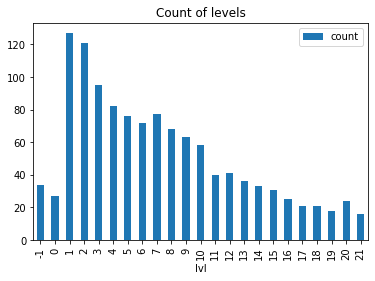

In [7]:
import matplotlib.pyplot as plt


level_count.plot.bar(x="lvl", y="count", title="Count of levels")
plt.show()

## Train test split

### Chronological split

In [8]:
from training.splitting_dataset import split_dataframe


os.chdir("../../../training")
X_train, X_test, y_train, y_test = split_dataframe(df, test_size=0.31)
os.chdir("../notebooks/models/lightgbm")

In [9]:
X_train = X_train.drop(columns=["book"])
X_test = X_test.drop(columns=["book"])

### Random split

In [10]:
(
    X_train_random_split,
    X_test_random_split,
    y_train_random_split,
    y_test_random_split,
) = split_dataframe(df, chronological_split=False)

In [11]:
X_train_random_split = X_train_random_split.drop(columns=["book"])
X_test_random_split = X_test_random_split.drop(columns=["book"])

## LightGBM

## Chronological split

In [12]:
import lightgbm as lgb

lgb_train = lgb.Dataset(X_train, y_train)
lgb_eval = lgb.Dataset(X_test, y_test, reference=lgb_train)

params = {
    "boosting_type": "gbdt",
    "objective": "regression",
    "metric": {"l2", "l1"},
}

gbm = lgb.train(
    params,
    lgb_train,
    num_boost_round=100,
    valid_sets=lgb_eval,
    callbacks=[lgb.early_stopping(stopping_rounds=5)],
)

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001299 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 756
[LightGBM] [Info] Number of data points in the train set: 841, number of used features: 45
[LightGBM] [Info] Start training from score 6.966706
Training until validation scores don't improve for 5 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Early stopping, best iteration is:
[88]	valid_0's l2: 0.932502	valid_0's l1: 0.463517


In [13]:
y_pred_train = gbm.predict(X_train, num_iteration=gbm.best_iteration)
y_pred_test = gbm.predict(X_test, num_iteration=gbm.best_iteration)

In [14]:
from sklearn.metrics import mean_squared_error, mean_absolute_error


rmse = mean_squared_error(y_test, y_pred_test, squared=False)
mae = mean_absolute_error(y_test, y_pred_test)

print(f"RMSE: {rmse:.2f}")
print(f"MAE: {mae:.2f}")

RMSE: 0.97
MAE: 0.46


In [15]:
results = pd.DataFrame(
    data={
        "Split type": [],
        "Tuning type": [],
        "Set of features": [],
        "RMSE": [],
        "MAE": [],
    }
)

results.loc[0] = ["chronological", "default", "full", rmse, mae]

In [16]:
rmse_train = mean_squared_error(y_train, y_pred_train, squared=False)
rmse_test = mean_squared_error(y_test, y_pred_test, squared=False)
print(f"RMSE train: {rmse_train:.2f}")
print(f"RMSE test: {rmse_test:.2f}")

RMSE train: 0.13
RMSE test: 0.97


###### MAE by level

In [17]:
from training.results import plot_mae_by_level

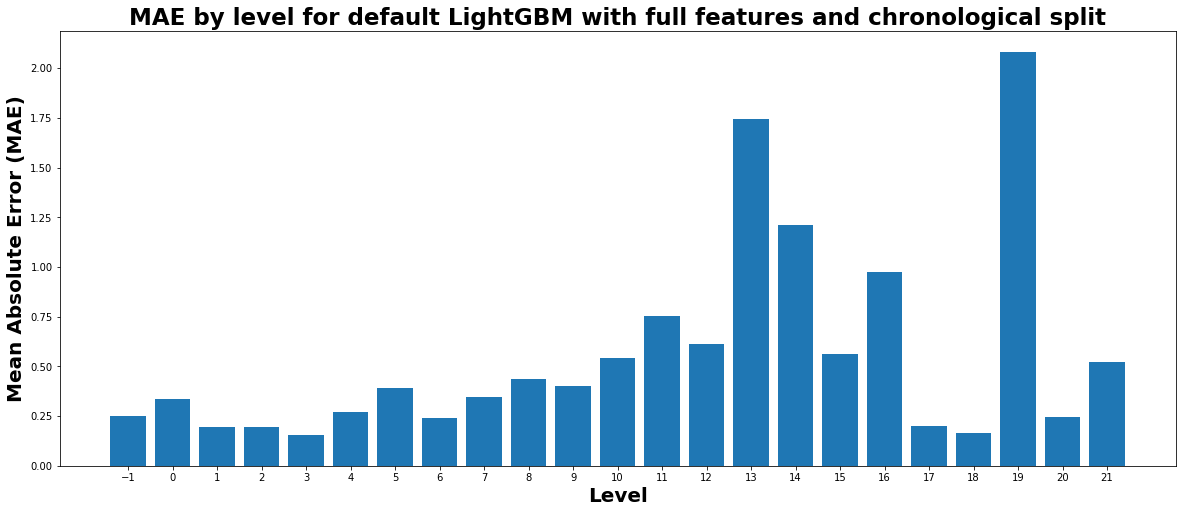

In [18]:
plot_mae_by_level(
    y_test,
    y_pred_test,
    title="MAE by level for default LightGBM with full features and chronological split",
)

In [19]:
from training.results import evaluate_round_predictions, plot_confusion_matrix


evaluate_round_predictions([0.5, 0.33, 0.45], y_test, y_pred_test)

Default:
RMSE: 0.97

Round type: 0.5
RMSE: 0.98

Round type: 0.33
RMSE: 0.96

Round type: 0.45
RMSE: 0.96



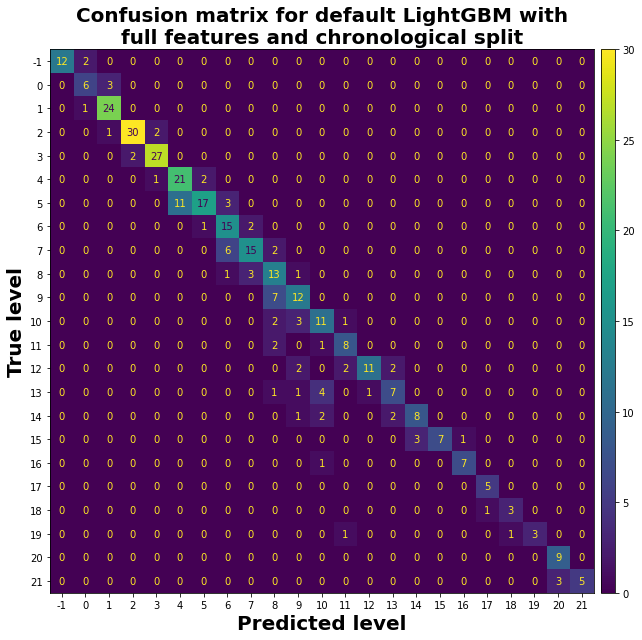

In [20]:
plot_confusion_matrix(
    y_pred_test,
    y_test,
    title="Confusion matrix for default LightGBM with\nfull features and chronological split",
)

#### Tuning

In [21]:
from training.results import assess_regression_model

In [22]:
import optuna.integration.lightgbm as lgb
from lightgbm import early_stopping, log_evaluation
from sklearn.model_selection import KFold
from sklearn.model_selection import RepeatedKFold


lgb_train = lgb.Dataset(X_train, y_train)

params = {
    "boosting_type": "gbdt",
    "objective": "regression",
    "metric": "l2",
    "verbosity": -1,
}

tuner = lgb.LightGBMTunerCV(
    params,
    lgb_train,
    folds=KFold(n_splits=5),
    num_boost_round=10000,
    callbacks=[early_stopping(100), log_evaluation(100)],
)

tuner.run()

[I 2023-11-09 20:46:52,604] A new study created in memory with name: no-name-08632538-4bfb-4625-b033-356903ec2622
feature_fraction, val_score: inf:   0%|                                                          | 0/7 [00:00<?, ?it/s]

Training until validation scores don't improve for 100 rounds
[100]	cv_agg's l2: 0.151172 + 0.0362745
[200]	cv_agg's l2: 0.147807 + 0.035733
[300]	cv_agg's l2: 0.147081 + 0.0362655
[400]	cv_agg's l2: 0.146852 + 0.0362315
[500]	cv_agg's l2: 0.146539 + 0.0358125


feature_fraction, val_score: 0.146458:  14%|######4                                      | 1/7 [00:12<01:12, 12.11s/it]

Early stopping, best iteration is:
[488]	cv_agg's l2: 0.146458 + 0.0357838
[100]	cv_agg's l2: 0.151393 + 0.0376705
[200]	cv_agg's l2: 0.149682 + 0.0372732
[300]	cv_agg's l2: 0.148999 + 0.0373819
[400]	cv_agg's l2: 0.14885 + 0.0376309
[500]	cv_agg's l2: 0.148963 + 0.0379129


feature_fraction, val_score: 0.146458:  29%|############8                                | 2/7 [00:21<00:53, 10.62s/it]

Early stopping, best iteration is:
[488]	cv_agg's l2: 0.146458 + 0.0357838
[100]	cv_agg's l2: 0.139602 + 0.0303038
[200]	cv_agg's l2: 0.136249 + 0.0301424
[300]	cv_agg's l2: 0.135656 + 0.0294605
[400]	cv_agg's l2: 0.135733 + 0.0293938


feature_fraction, val_score: 0.135445:  43%|###################2                         | 3/7 [00:29<00:37,  9.26s/it]

Early stopping, best iteration is:
[322]	cv_agg's l2: 0.135445 + 0.0294075
[100]	cv_agg's l2: 0.142295 + 0.0295492
[200]	cv_agg's l2: 0.138578 + 0.0289395
[300]	cv_agg's l2: 0.13813 + 0.0288636
[400]	cv_agg's l2: 0.137706 + 0.0285171


feature_fraction, val_score: 0.135445:  57%|#########################7                   | 4/7 [00:36<00:25,  8.41s/it]

Early stopping, best iteration is:
[322]	cv_agg's l2: 0.135445 + 0.0294075
[100]	cv_agg's l2: 0.140273 + 0.0295095
[200]	cv_agg's l2: 0.138006 + 0.0283372
[300]	cv_agg's l2: 0.137821 + 0.0283476
[400]	cv_agg's l2: 0.137655 + 0.028449


feature_fraction, val_score: 0.135445:  71%|################################1            | 5/7 [00:43<00:15,  7.98s/it]

Early stopping, best iteration is:
[322]	cv_agg's l2: 0.135445 + 0.0294075
[100]	cv_agg's l2: 0.136763 + 0.0331273
[200]	cv_agg's l2: 0.133201 + 0.0292263
[300]	cv_agg's l2: 0.132313 + 0.0291824
[400]	cv_agg's l2: 0.131823 + 0.0289118


feature_fraction, val_score: 0.131757:  86%|######################################5      | 6/7 [00:52<00:08,  8.12s/it]

[500]	cv_agg's l2: 0.131825 + 0.028844
Early stopping, best iteration is:
[403]	cv_agg's l2: 0.131757 + 0.0288995
[100]	cv_agg's l2: 0.135816 + 0.0324853
[200]	cv_agg's l2: 0.130532 + 0.0296941
[300]	cv_agg's l2: 0.129665 + 0.0293044
[400]	cv_agg's l2: 0.129449 + 0.0293716


feature_fraction, val_score: 0.129380: 100%|#############################################| 7/7 [01:00<00:00,  8.71s/it]


[500]	cv_agg's l2: 0.12953 + 0.0293363
Early stopping, best iteration is:
[406]	cv_agg's l2: 0.12938 + 0.0293756


num_leaves, val_score: 0.129380:   0%|                                                          | 0/20 [00:00<?, ?it/s]

[100]	cv_agg's l2: 0.135816 + 0.0324853
[200]	cv_agg's l2: 0.130532 + 0.0296941
[300]	cv_agg's l2: 0.129665 + 0.0293044
[400]	cv_agg's l2: 0.129449 + 0.0293716


num_leaves, val_score: 0.129380:   5%|##5                                               | 1/20 [00:09<02:56,  9.28s/it]

[500]	cv_agg's l2: 0.12953 + 0.0293363
Early stopping, best iteration is:
[406]	cv_agg's l2: 0.12938 + 0.0293756
[100]	cv_agg's l2: 0.135816 + 0.0324853
[200]	cv_agg's l2: 0.130532 + 0.0296941
[300]	cv_agg's l2: 0.129665 + 0.0293044
[400]	cv_agg's l2: 0.129449 + 0.0293716


num_leaves, val_score: 0.129380:  10%|#####                                             | 2/20 [00:19<03:01, 10.09s/it]

[500]	cv_agg's l2: 0.12953 + 0.0293363
Early stopping, best iteration is:
[406]	cv_agg's l2: 0.12938 + 0.0293756
[100]	cv_agg's l2: 0.135816 + 0.0324853
[200]	cv_agg's l2: 0.130532 + 0.0296941
[300]	cv_agg's l2: 0.129665 + 0.0293044
[400]	cv_agg's l2: 0.129449 + 0.0293716


num_leaves, val_score: 0.129380:  15%|#######5                                          | 3/20 [00:28<02:43,  9.62s/it]

[500]	cv_agg's l2: 0.12953 + 0.0293363
Early stopping, best iteration is:
[406]	cv_agg's l2: 0.12938 + 0.0293756
[100]	cv_agg's l2: 0.295541 + 0.033896
[200]	cv_agg's l2: 0.261302 + 0.0318862
[300]	cv_agg's l2: 0.251453 + 0.02813
[400]	cv_agg's l2: 0.244245 + 0.0268973


num_leaves, val_score: 0.129380:  20%|##########                                        | 4/20 [00:30<01:41,  6.37s/it]

[500]	cv_agg's l2: 0.238489 + 0.0262987
Early stopping, best iteration is:
[406]	cv_agg's l2: 0.12938 + 0.0293756
[100]	cv_agg's l2: 0.135816 + 0.0324853
[200]	cv_agg's l2: 0.130532 + 0.0296941
[300]	cv_agg's l2: 0.129665 + 0.0293044
[400]	cv_agg's l2: 0.129449 + 0.0293716


num_leaves, val_score: 0.129380:  25%|############5                                     | 5/20 [00:39<01:51,  7.40s/it]

[500]	cv_agg's l2: 0.12953 + 0.0293363
Early stopping, best iteration is:
[406]	cv_agg's l2: 0.12938 + 0.0293756
[100]	cv_agg's l2: 0.135816 + 0.0324853
[200]	cv_agg's l2: 0.130532 + 0.0296941
[300]	cv_agg's l2: 0.129665 + 0.0293044
[400]	cv_agg's l2: 0.129449 + 0.0293716


num_leaves, val_score: 0.129380:  30%|###############                                   | 6/20 [00:48<01:51,  7.97s/it]

[500]	cv_agg's l2: 0.12953 + 0.0293363
Early stopping, best iteration is:
[406]	cv_agg's l2: 0.12938 + 0.0293756
[100]	cv_agg's l2: 0.135816 + 0.0324853
[200]	cv_agg's l2: 0.130532 + 0.0296941
[300]	cv_agg's l2: 0.129665 + 0.0293044
[400]	cv_agg's l2: 0.129449 + 0.0293716


num_leaves, val_score: 0.129380:  30%|###############                                   | 6/20 [00:58<01:51,  7.97s/it]

[500]	cv_agg's l2: 0.12953 + 0.0293363
Early stopping, best iteration is:
[406]	cv_agg's l2: 0.12938 + 0.0293756


num_leaves, val_score: 0.129380:  35%|#################5                                | 7/20 [00:58<01:51,  8.54s/it]

[100]	cv_agg's l2: 0.135816 + 0.0324853
[200]	cv_agg's l2: 0.130532 + 0.0296941
[300]	cv_agg's l2: 0.129665 + 0.0293044
[400]	cv_agg's l2: 0.129449 + 0.0293716


num_leaves, val_score: 0.129380:  35%|#################5                                | 7/20 [01:07<01:51,  8.54s/it]

[500]	cv_agg's l2: 0.12953 + 0.0293363
Early stopping, best iteration is:
[406]	cv_agg's l2: 0.12938 + 0.0293756


num_leaves, val_score: 0.129380:  40%|####################                              | 8/20 [01:07<01:46,  8.87s/it]

[100]	cv_agg's l2: 0.135816 + 0.0324853
[200]	cv_agg's l2: 0.130532 + 0.0296941
[300]	cv_agg's l2: 0.129665 + 0.0293044
[400]	cv_agg's l2: 0.129449 + 0.0293716


num_leaves, val_score: 0.129380:  45%|######################5                           | 9/20 [01:17<01:41,  9.22s/it]

[500]	cv_agg's l2: 0.12953 + 0.0293363
Early stopping, best iteration is:
[406]	cv_agg's l2: 0.12938 + 0.0293756
[100]	cv_agg's l2: 0.135816 + 0.0324853
[200]	cv_agg's l2: 0.130532 + 0.0296941
[300]	cv_agg's l2: 0.129665 + 0.0293044
[400]	cv_agg's l2: 0.129449 + 0.0293716


num_leaves, val_score: 0.129380:  50%|########################5                        | 10/20 [01:27<01:32,  9.20s/it]

[500]	cv_agg's l2: 0.12953 + 0.0293363
Early stopping, best iteration is:
[406]	cv_agg's l2: 0.12938 + 0.0293756
[100]	cv_agg's l2: 0.135816 + 0.0324853
[200]	cv_agg's l2: 0.130532 + 0.0296941
[300]	cv_agg's l2: 0.129665 + 0.0293044
[400]	cv_agg's l2: 0.129449 + 0.0293716


num_leaves, val_score: 0.129380:  55%|##########################9                      | 11/20 [01:36<01:23,  9.25s/it]

[500]	cv_agg's l2: 0.12953 + 0.0293363
Early stopping, best iteration is:
[406]	cv_agg's l2: 0.12938 + 0.0293756
[100]	cv_agg's l2: 0.135816 + 0.0324853
[200]	cv_agg's l2: 0.130532 + 0.0296941
[300]	cv_agg's l2: 0.129665 + 0.0293044
[400]	cv_agg's l2: 0.129449 + 0.0293716


num_leaves, val_score: 0.129380:  60%|#############################4                   | 12/20 [01:46<01:14,  9.34s/it]

[500]	cv_agg's l2: 0.12953 + 0.0293363
Early stopping, best iteration is:
[406]	cv_agg's l2: 0.12938 + 0.0293756
[100]	cv_agg's l2: 0.135816 + 0.0324853
[200]	cv_agg's l2: 0.130532 + 0.0296941
[300]	cv_agg's l2: 0.129665 + 0.0293044
[400]	cv_agg's l2: 0.129449 + 0.0293716


num_leaves, val_score: 0.129380:  65%|###############################8                 | 13/20 [01:55<01:05,  9.34s/it]

[500]	cv_agg's l2: 0.12953 + 0.0293363
Early stopping, best iteration is:
[406]	cv_agg's l2: 0.12938 + 0.0293756
[100]	cv_agg's l2: 0.135816 + 0.0324853
[200]	cv_agg's l2: 0.130532 + 0.0296941
[300]	cv_agg's l2: 0.129665 + 0.0293044
[400]	cv_agg's l2: 0.129449 + 0.0293716


num_leaves, val_score: 0.129380:  70%|##################################3              | 14/20 [02:04<00:55,  9.22s/it]

[500]	cv_agg's l2: 0.12953 + 0.0293363
Early stopping, best iteration is:
[406]	cv_agg's l2: 0.12938 + 0.0293756
[100]	cv_agg's l2: 0.135816 + 0.0324853
[200]	cv_agg's l2: 0.130532 + 0.0296941
[300]	cv_agg's l2: 0.129665 + 0.0293044
[400]	cv_agg's l2: 0.129449 + 0.0293716


num_leaves, val_score: 0.129380:  75%|####################################7            | 15/20 [02:13<00:45,  9.19s/it]

[500]	cv_agg's l2: 0.12953 + 0.0293363
Early stopping, best iteration is:
[406]	cv_agg's l2: 0.12938 + 0.0293756
[100]	cv_agg's l2: 0.135816 + 0.0324853
[200]	cv_agg's l2: 0.130532 + 0.0296941
[300]	cv_agg's l2: 0.129665 + 0.0293044
[400]	cv_agg's l2: 0.129449 + 0.0293716


num_leaves, val_score: 0.129380:  80%|#######################################2         | 16/20 [02:22<00:36,  9.17s/it]

[500]	cv_agg's l2: 0.12953 + 0.0293363
Early stopping, best iteration is:
[406]	cv_agg's l2: 0.12938 + 0.0293756
[100]	cv_agg's l2: 0.135816 + 0.0324853
[200]	cv_agg's l2: 0.130532 + 0.0296941
[300]	cv_agg's l2: 0.129665 + 0.0293044
[400]	cv_agg's l2: 0.129449 + 0.0293716


num_leaves, val_score: 0.129380:  85%|#########################################6       | 17/20 [02:31<00:27,  9.16s/it]

[500]	cv_agg's l2: 0.12953 + 0.0293363
Early stopping, best iteration is:
[406]	cv_agg's l2: 0.12938 + 0.0293756
[100]	cv_agg's l2: 0.146442 + 0.0280866
[200]	cv_agg's l2: 0.139021 + 0.0251411
[300]	cv_agg's l2: 0.136383 + 0.0248899
[400]	cv_agg's l2: 0.135379 + 0.0241111


num_leaves, val_score: 0.129380:  90%|############################################1    | 18/20 [02:35<00:15,  7.65s/it]

[500]	cv_agg's l2: 0.135425 + 0.0247987
Early stopping, best iteration is:
[406]	cv_agg's l2: 0.12938 + 0.0293756
[100]	cv_agg's l2: 0.135816 + 0.0324853
[200]	cv_agg's l2: 0.130532 + 0.0296941
[300]	cv_agg's l2: 0.129665 + 0.0293044
[400]	cv_agg's l2: 0.129449 + 0.0293716


num_leaves, val_score: 0.129380:  95%|##############################################5  | 19/20 [02:44<00:08,  8.05s/it]

[500]	cv_agg's l2: 0.12953 + 0.0293363
Early stopping, best iteration is:
[406]	cv_agg's l2: 0.12938 + 0.0293756
[100]	cv_agg's l2: 0.135816 + 0.0324853
[200]	cv_agg's l2: 0.130532 + 0.0296941
[300]	cv_agg's l2: 0.129665 + 0.0293044
[400]	cv_agg's l2: 0.129449 + 0.0293716


num_leaves, val_score: 0.129380: 100%|#################################################| 20/20 [02:53<00:00,  8.69s/it]


[500]	cv_agg's l2: 0.12953 + 0.0293363
Early stopping, best iteration is:
[406]	cv_agg's l2: 0.12938 + 0.0293756


bagging, val_score: 0.129380:   0%|                                                             | 0/10 [00:00<?, ?it/s]

[100]	cv_agg's l2: 0.173548 + 0.0463414
[200]	cv_agg's l2: 0.165293 + 0.0426818
[300]	cv_agg's l2: 0.163784 + 0.0426931
[400]	cv_agg's l2: 0.164839 + 0.0428706


bagging, val_score: 0.129380:  10%|#####3                                               | 1/10 [00:05<00:49,  5.50s/it]

[500]	cv_agg's l2: 0.165143 + 0.0444317
Early stopping, best iteration is:
[406]	cv_agg's l2: 0.12938 + 0.0293756
[100]	cv_agg's l2: 0.138209 + 0.030631
[200]	cv_agg's l2: 0.134217 + 0.029675
[300]	cv_agg's l2: 0.133435 + 0.029502
[400]	cv_agg's l2: 0.133024 + 0.029263
[500]	cv_agg's l2: 0.132866 + 0.0290185


bagging, val_score: 0.129380:  20%|##########6                                          | 2/10 [00:15<01:06,  8.28s/it]

Early stopping, best iteration is:
[406]	cv_agg's l2: 0.12938 + 0.0293756
[100]	cv_agg's l2: 0.208072 + 0.0352465
[200]	cv_agg's l2: 0.190867 + 0.0382839
[300]	cv_agg's l2: 0.191673 + 0.0367848
[400]	cv_agg's l2: 0.186406 + 0.0393048


bagging, val_score: 0.129380:  30%|###############9                                     | 3/10 [00:21<00:50,  7.19s/it]

[500]	cv_agg's l2: 0.188649 + 0.0396595
Early stopping, best iteration is:
[406]	cv_agg's l2: 0.12938 + 0.0293756
[100]	cv_agg's l2: 0.149849 + 0.0267984
[200]	cv_agg's l2: 0.145785 + 0.026772
[300]	cv_agg's l2: 0.144417 + 0.026325
[400]	cv_agg's l2: 0.144236 + 0.0259396


bagging, val_score: 0.129380:  40%|#####################2                               | 4/10 [00:27<00:40,  6.83s/it]

[500]	cv_agg's l2: 0.144282 + 0.0260472
Early stopping, best iteration is:
[406]	cv_agg's l2: 0.12938 + 0.0293756
[100]	cv_agg's l2: 0.15539 + 0.0346455
[200]	cv_agg's l2: 0.149849 + 0.0330367
[300]	cv_agg's l2: 0.14959 + 0.0326146
[400]	cv_agg's l2: 0.149871 + 0.0327823


bagging, val_score: 0.129380:  50%|##########################5                          | 5/10 [00:34<00:32,  6.57s/it]

[500]	cv_agg's l2: 0.150918 + 0.0338744
Early stopping, best iteration is:
[406]	cv_agg's l2: 0.12938 + 0.0293756
[100]	cv_agg's l2: 0.137944 + 0.0304516
[200]	cv_agg's l2: 0.133087 + 0.0284984
[300]	cv_agg's l2: 0.132113 + 0.027905
[400]	cv_agg's l2: 0.131987 + 0.0279466


bagging, val_score: 0.129380:  60%|###############################8                     | 6/10 [00:42<00:28,  7.15s/it]

[500]	cv_agg's l2: 0.132426 + 0.0282109
Early stopping, best iteration is:
[406]	cv_agg's l2: 0.12938 + 0.0293756
[100]	cv_agg's l2: 0.222336 + 0.0634127
[200]	cv_agg's l2: 0.204405 + 0.0626711
[300]	cv_agg's l2: 0.205244 + 0.0620765
[400]	cv_agg's l2: 0.203412 + 0.0663469


bagging, val_score: 0.129380:  70%|#####################################                | 7/10 [00:45<00:18,  6.01s/it]

[500]	cv_agg's l2: 0.202905 + 0.0630602
Early stopping, best iteration is:
[406]	cv_agg's l2: 0.12938 + 0.0293756
[100]	cv_agg's l2: 0.159104 + 0.0324344
[200]	cv_agg's l2: 0.155006 + 0.0271218
[300]	cv_agg's l2: 0.154684 + 0.027466
[400]	cv_agg's l2: 0.15462 + 0.0264649


bagging, val_score: 0.129380:  80%|##########################################4          | 8/10 [00:51<00:11,  5.94s/it]

[500]	cv_agg's l2: 0.154928 + 0.0242459
Early stopping, best iteration is:
[406]	cv_agg's l2: 0.12938 + 0.0293756
[100]	cv_agg's l2: 0.152611 + 0.0435281
[200]	cv_agg's l2: 0.147316 + 0.0405306
[300]	cv_agg's l2: 0.147168 + 0.0384943
[400]	cv_agg's l2: 0.147079 + 0.037288


bagging, val_score: 0.129380:  90%|###############################################7     | 9/10 [00:59<00:06,  6.46s/it]

[500]	cv_agg's l2: 0.146355 + 0.0362646
Early stopping, best iteration is:
[406]	cv_agg's l2: 0.12938 + 0.0293756
[100]	cv_agg's l2: 0.143906 + 0.032791
[200]	cv_agg's l2: 0.13932 + 0.0311104
[300]	cv_agg's l2: 0.138269 + 0.0304734
[400]	cv_agg's l2: 0.137845 + 0.0305217


bagging, val_score: 0.129380: 100%|####################################################| 10/10 [01:07<00:00,  6.73s/it]


[500]	cv_agg's l2: 0.13791 + 0.0300329
Early stopping, best iteration is:
[406]	cv_agg's l2: 0.12938 + 0.0293756


feature_fraction_stage2, val_score: 0.129380:   0%|                                              | 0/6 [00:00<?, ?it/s]

[100]	cv_agg's l2: 0.143481 + 0.0368109
[200]	cv_agg's l2: 0.14091 + 0.0359799
[300]	cv_agg's l2: 0.140171 + 0.0349962
[400]	cv_agg's l2: 0.139892 + 0.0346039


feature_fraction_stage2, val_score: 0.129380:  17%|######3                               | 1/6 [00:09<00:46,  9.24s/it]

[500]	cv_agg's l2: 0.139658 + 0.0342894
Early stopping, best iteration is:
[406]	cv_agg's l2: 0.12938 + 0.0293756
[100]	cv_agg's l2: 0.139562 + 0.0337024
[200]	cv_agg's l2: 0.136052 + 0.0330496
[300]	cv_agg's l2: 0.135664 + 0.0324422
[400]	cv_agg's l2: 0.135477 + 0.0325419


feature_fraction_stage2, val_score: 0.129380:  33%|############6                         | 2/6 [00:18<00:36,  9.08s/it]

[500]	cv_agg's l2: 0.135236 + 0.0326663
Early stopping, best iteration is:
[406]	cv_agg's l2: 0.12938 + 0.0293756
[100]	cv_agg's l2: 0.140592 + 0.0327434
[200]	cv_agg's l2: 0.136401 + 0.0299106
[300]	cv_agg's l2: 0.135675 + 0.029006
[400]	cv_agg's l2: 0.135643 + 0.0287864


feature_fraction_stage2, val_score: 0.129380:  50%|###################                   | 3/6 [00:26<00:26,  8.73s/it]

[500]	cv_agg's l2: 0.135478 + 0.0285997
Early stopping, best iteration is:
[406]	cv_agg's l2: 0.12938 + 0.0293756
[100]	cv_agg's l2: 0.132027 + 0.0280752
[200]	cv_agg's l2: 0.128112 + 0.0259803
[300]	cv_agg's l2: 0.127962 + 0.0254438


feature_fraction_stage2, val_score: 0.127768:  67%|#########################3            | 4/6 [00:32<00:15,  7.53s/it]

Early stopping, best iteration is:
[230]	cv_agg's l2: 0.127768 + 0.025418
[100]	cv_agg's l2: 0.13861 + 0.0315068
[200]	cv_agg's l2: 0.135459 + 0.0288234
[300]	cv_agg's l2: 0.134847 + 0.0288127


feature_fraction_stage2, val_score: 0.127768:  83%|###############################6      | 5/6 [00:37<00:06,  6.80s/it]

Early stopping, best iteration is:
[230]	cv_agg's l2: 0.127768 + 0.025418
[100]	cv_agg's l2: 0.135548 + 0.0303853
[200]	cv_agg's l2: 0.12996 + 0.0278673
[300]	cv_agg's l2: 0.129044 + 0.0274912


feature_fraction_stage2, val_score: 0.127768: 100%|######################################| 6/6 [00:43<00:00,  7.21s/it]


Early stopping, best iteration is:
[230]	cv_agg's l2: 0.127768 + 0.025418


regularization_factors, val_score: 0.127768:   0%|                                              | 0/20 [00:00<?, ?it/s]

[100]	cv_agg's l2: 0.130662 + 0.0267816
[200]	cv_agg's l2: 0.127461 + 0.0242728
[300]	cv_agg's l2: 0.126922 + 0.0239095


regularization_factors, val_score: 0.126872:   5%|#9                                    | 1/20 [00:07<02:21,  7.46s/it]

[400]	cv_agg's l2: 0.127074 + 0.0234925
Early stopping, best iteration is:
[306]	cv_agg's l2: 0.126872 + 0.0238295
[100]	cv_agg's l2: 0.133456 + 0.0301086
[200]	cv_agg's l2: 0.130649 + 0.0280846
[300]	cv_agg's l2: 0.130249 + 0.0287151


regularization_factors, val_score: 0.126872:  10%|###8                                  | 2/20 [00:14<02:06,  7.02s/it]

[400]	cv_agg's l2: 0.130118 + 0.0282563
Early stopping, best iteration is:
[306]	cv_agg's l2: 0.126872 + 0.0238295
[100]	cv_agg's l2: 0.132027 + 0.0280752
[200]	cv_agg's l2: 0.128112 + 0.0259803
[300]	cv_agg's l2: 0.12789 + 0.0254636


regularization_factors, val_score: 0.126872:  15%|#####7                                | 3/20 [00:20<01:57,  6.93s/it]

[400]	cv_agg's l2: 0.128028 + 0.0251753
Early stopping, best iteration is:
[306]	cv_agg's l2: 0.126872 + 0.0238295
[100]	cv_agg's l2: 0.132027 + 0.0280752
[200]	cv_agg's l2: 0.128112 + 0.0259803
[300]	cv_agg's l2: 0.127962 + 0.0254438


regularization_factors, val_score: 0.126872:  20%|#######6                              | 4/20 [00:28<01:52,  7.05s/it]

[400]	cv_agg's l2: 0.128115 + 0.0252108
Early stopping, best iteration is:
[306]	cv_agg's l2: 0.126872 + 0.0238295
[100]	cv_agg's l2: 0.132027 + 0.0280752
[200]	cv_agg's l2: 0.128112 + 0.0259803
[300]	cv_agg's l2: 0.127962 + 0.0254438


regularization_factors, val_score: 0.126872:  25%|#########5                            | 5/20 [00:35<01:45,  7.01s/it]

[400]	cv_agg's l2: 0.128115 + 0.0252108
Early stopping, best iteration is:
[306]	cv_agg's l2: 0.126872 + 0.0238295
[100]	cv_agg's l2: 0.132027 + 0.0280752
[200]	cv_agg's l2: 0.128112 + 0.0259803
[300]	cv_agg's l2: 0.127962 + 0.0254438


regularization_factors, val_score: 0.126872:  30%|###########4                          | 6/20 [00:42<01:40,  7.18s/it]

[400]	cv_agg's l2: 0.128115 + 0.0252108
Early stopping, best iteration is:
[306]	cv_agg's l2: 0.126872 + 0.0238295
[100]	cv_agg's l2: 0.132027 + 0.0280752
[200]	cv_agg's l2: 0.128112 + 0.0259803
[300]	cv_agg's l2: 0.127962 + 0.0254438


regularization_factors, val_score: 0.126872:  35%|#############3                        | 7/20 [00:49<01:33,  7.16s/it]

[400]	cv_agg's l2: 0.128115 + 0.0252108
Early stopping, best iteration is:
[306]	cv_agg's l2: 0.126872 + 0.0238295
[100]	cv_agg's l2: 0.132027 + 0.0280752
[200]	cv_agg's l2: 0.128112 + 0.0259803
[300]	cv_agg's l2: 0.12789 + 0.0254636


regularization_factors, val_score: 0.126872:  40%|###############2                      | 8/20 [00:56<01:25,  7.16s/it]

[400]	cv_agg's l2: 0.12805 + 0.025228
Early stopping, best iteration is:
[306]	cv_agg's l2: 0.126872 + 0.0238295
[100]	cv_agg's l2: 0.132027 + 0.0280752
[200]	cv_agg's l2: 0.128112 + 0.0259803
[300]	cv_agg's l2: 0.12789 + 0.0254636


regularization_factors, val_score: 0.126872:  45%|#################1                    | 9/20 [01:04<01:19,  7.19s/it]

[400]	cv_agg's l2: 0.12805 + 0.025228
Early stopping, best iteration is:
[306]	cv_agg's l2: 0.126872 + 0.0238295
[100]	cv_agg's l2: 0.132027 + 0.0280752
[200]	cv_agg's l2: 0.128113 + 0.0259802
[300]	cv_agg's l2: 0.127954 + 0.0254249


regularization_factors, val_score: 0.126872:  50%|##################5                  | 10/20 [01:14<01:22,  8.26s/it]

[400]	cv_agg's l2: 0.128145 + 0.0251048
Early stopping, best iteration is:
[306]	cv_agg's l2: 0.126872 + 0.0238295
[100]	cv_agg's l2: 0.131528 + 0.027345
[200]	cv_agg's l2: 0.128032 + 0.0258715
[300]	cv_agg's l2: 0.127652 + 0.0250192


regularization_factors, val_score: 0.126872:  55%|####################3                | 11/20 [01:23<01:15,  8.43s/it]

[400]	cv_agg's l2: 0.127715 + 0.0246489
Early stopping, best iteration is:
[306]	cv_agg's l2: 0.126872 + 0.0238295
[100]	cv_agg's l2: 0.13104 + 0.0278774
[200]	cv_agg's l2: 0.129072 + 0.0265301
[300]	cv_agg's l2: 0.128718 + 0.0261369


regularization_factors, val_score: 0.126872:  60%|######################2              | 12/20 [01:30<01:03,  7.88s/it]

[400]	cv_agg's l2: 0.128568 + 0.0256386
Early stopping, best iteration is:
[306]	cv_agg's l2: 0.126872 + 0.0238295
[100]	cv_agg's l2: 0.131528 + 0.027345
[200]	cv_agg's l2: 0.128032 + 0.0258715
[300]	cv_agg's l2: 0.127652 + 0.0250192


regularization_factors, val_score: 0.126872:  65%|########################             | 13/20 [01:35<00:50,  7.21s/it]

[400]	cv_agg's l2: 0.127715 + 0.0246489
Early stopping, best iteration is:
[306]	cv_agg's l2: 0.126872 + 0.0238295
[100]	cv_agg's l2: 0.131059 + 0.0278579
[200]	cv_agg's l2: 0.129301 + 0.0258954
[300]	cv_agg's l2: 0.128964 + 0.0254493


regularization_factors, val_score: 0.126872:  70%|#########################9           | 14/20 [01:45<00:48,  8.04s/it]

[400]	cv_agg's l2: 0.128977 + 0.0253334
Early stopping, best iteration is:
[306]	cv_agg's l2: 0.126872 + 0.0238295
[100]	cv_agg's l2: 0.132104 + 0.0274561
[200]	cv_agg's l2: 0.129592 + 0.0260074
[300]	cv_agg's l2: 0.128882 + 0.0252405


regularization_factors, val_score: 0.126872:  75%|###########################7         | 15/20 [01:49<00:34,  6.80s/it]

[400]	cv_agg's l2: 0.128718 + 0.0249019
Early stopping, best iteration is:
[306]	cv_agg's l2: 0.126872 + 0.0238295
[100]	cv_agg's l2: 0.130227 + 0.0264637
[200]	cv_agg's l2: 0.128113 + 0.0250043
[300]	cv_agg's l2: 0.127255 + 0.0246308


regularization_factors, val_score: 0.126872:  75%|###########################7         | 15/20 [01:54<00:34,  6.80s/it]

[400]	cv_agg's l2: 0.127412 + 0.0247977
Early stopping, best iteration is:
[306]	cv_agg's l2: 0.126872 + 0.0238295


regularization_factors, val_score: 0.126872:  80%|#############################6       | 16/20 [01:54<00:24,  6.04s/it]

[100]	cv_agg's l2: 0.132916 + 0.0309195
[200]	cv_agg's l2: 0.13031 + 0.0284676
[300]	cv_agg's l2: 0.129747 + 0.0269891


regularization_factors, val_score: 0.126872:  85%|###############################4     | 17/20 [01:57<00:15,  5.17s/it]

[400]	cv_agg's l2: 0.129443 + 0.0267302
Early stopping, best iteration is:
[306]	cv_agg's l2: 0.126872 + 0.0238295
[100]	cv_agg's l2: 0.134234 + 0.0308324
[200]	cv_agg's l2: 0.1311 + 0.030443
[300]	cv_agg's l2: 0.130437 + 0.0298343


regularization_factors, val_score: 0.126872:  90%|#################################3   | 18/20 [01:59<00:08,  4.36s/it]

[400]	cv_agg's l2: 0.130566 + 0.0296686
Early stopping, best iteration is:
[306]	cv_agg's l2: 0.126872 + 0.0238295
[100]	cv_agg's l2: 0.132027 + 0.0280752
[200]	cv_agg's l2: 0.128113 + 0.0259802
[300]	cv_agg's l2: 0.127954 + 0.0254249


regularization_factors, val_score: 0.126872:  95%|###################################1 | 19/20 [02:02<00:03,  3.77s/it]

[400]	cv_agg's l2: 0.128145 + 0.0251048
Early stopping, best iteration is:
[306]	cv_agg's l2: 0.126872 + 0.0238295
[100]	cv_agg's l2: 0.131643 + 0.0283846
[200]	cv_agg's l2: 0.127838 + 0.0261529
[300]	cv_agg's l2: 0.127676 + 0.0255999


regularization_factors, val_score: 0.126872: 100%|#####################################| 20/20 [02:04<00:00,  6.23s/it]


[400]	cv_agg's l2: 0.12765 + 0.0253868
Early stopping, best iteration is:
[306]	cv_agg's l2: 0.126872 + 0.0238295


min_data_in_leaf, val_score: 0.126872:   0%|                                                     | 0/5 [00:00<?, ?it/s]

[100]	cv_agg's l2: 0.154479 + 0.0330317
[200]	cv_agg's l2: 0.15103 + 0.0292136
[300]	cv_agg's l2: 0.149461 + 0.0272138


min_data_in_leaf, val_score: 0.126872:  20%|#########                                    | 1/5 [00:02<00:09,  2.48s/it]

[400]	cv_agg's l2: 0.149423 + 0.0268656
Early stopping, best iteration is:
[306]	cv_agg's l2: 0.126872 + 0.0238295
[100]	cv_agg's l2: 0.213239 + 0.035842
[200]	cv_agg's l2: 0.202131 + 0.0357642
[300]	cv_agg's l2: 0.198496 + 0.0372248


min_data_in_leaf, val_score: 0.126872:  40%|##################                           | 2/5 [00:03<00:05,  1.83s/it]

[400]	cv_agg's l2: 0.198664 + 0.0387309
Early stopping, best iteration is:
[306]	cv_agg's l2: 0.126872 + 0.0238295
[100]	cv_agg's l2: 0.123229 + 0.026488
[200]	cv_agg's l2: 0.122012 + 0.0262652
[300]	cv_agg's l2: 0.121723 + 0.0263771
[400]	cv_agg's l2: 0.121446 + 0.0263371
[500]	cv_agg's l2: 0.12139 + 0.0263358


min_data_in_leaf, val_score: 0.121377:  60%|###########################                  | 3/5 [00:08<00:05,  2.98s/it]

Early stopping, best iteration is:
[464]	cv_agg's l2: 0.121377 + 0.0263158
[100]	cv_agg's l2: 0.120892 + 0.0201758
[200]	cv_agg's l2: 0.120447 + 0.0198928
[300]	cv_agg's l2: 0.120321 + 0.0199536
[400]	cv_agg's l2: 0.120165 + 0.0199218


min_data_in_leaf, val_score: 0.120132:  80%|####################################         | 4/5 [00:11<00:03,  3.16s/it]

[500]	cv_agg's l2: 0.120134 + 0.0199245
Early stopping, best iteration is:
[467]	cv_agg's l2: 0.120132 + 0.019927
[100]	cv_agg's l2: 0.719503 + 0.121424
[200]	cv_agg's l2: 0.677703 + 0.129362
[300]	cv_agg's l2: 0.661062 + 0.128572
[400]	cv_agg's l2: 0.652966 + 0.131874


min_data_in_leaf, val_score: 0.120132: 100%|#############################################| 5/5 [00:13<00:00,  2.61s/it]

[500]	cv_agg's l2: 0.648267 + 0.132573
Early stopping, best iteration is:
[467]	cv_agg's l2: 0.120132 + 0.019927


In [23]:
print(f"Best score: {tuner.best_score}")
best_params = tuner.best_params
print("Params: ")
for key, value in best_params.items():
    print("    {}: {}".format(key, value))

Best score: 0.12013241021798529
Params: 
    boosting_type: gbdt
    objective: regression
    metric: l2
    verbosity: -1
    feature_pre_filter: False
    lambda_l1: 0.011371261346929128
    lambda_l2: 1.1679987787365405e-05
    num_leaves: 31
    feature_fraction: 0.484
    bagging_fraction: 1.0
    bagging_freq: 0
    min_child_samples: 5


In [24]:
import lightgbm as lgb

lgb_tuned = lgb.train(
    best_params,
    lgb_train,
    num_boost_round=10000,
)

In [25]:
rmse, mae = assess_regression_model(lgb_tuned, X_train, X_test, y_train, y_test)

RMSE train: 0.00
RMSE test: 0.68
MAE test: 0.39



In [26]:
results.loc[1] = [
    "chronological",
    "Optuna",
    "full",
    rmse,
    mae,
]

###### MAE by level

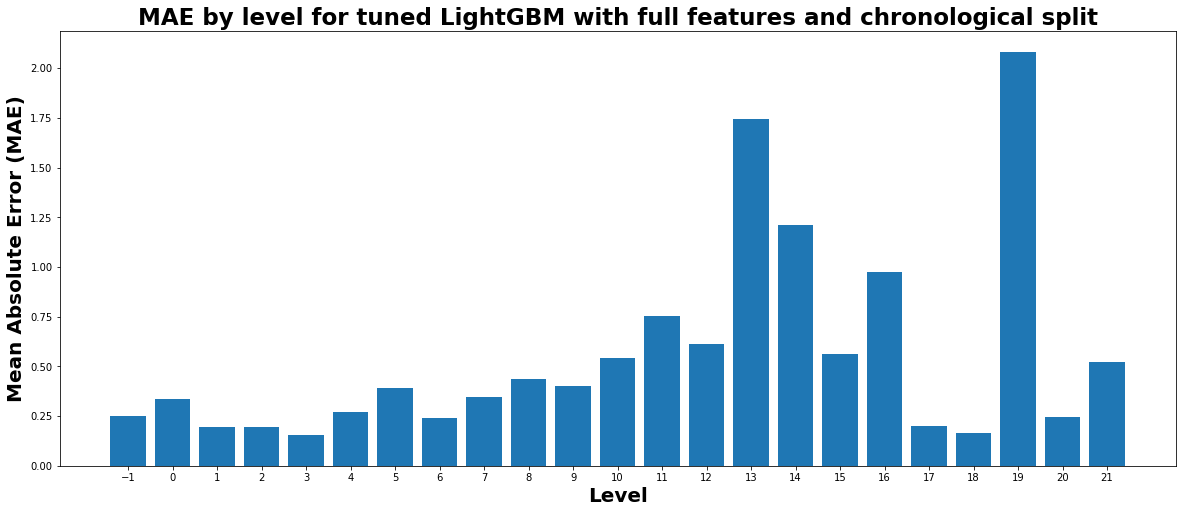

In [27]:
plot_mae_by_level(
    y_test,
    y_pred_test,
    title="MAE by level for tuned LightGBM with full features and chronological split",
)

In [28]:
predict = lgb_tuned.predict(X_test)
evaluate_round_predictions([0.5, 0.33, 0.45], y_test, predict)

Default:
RMSE: 0.68

Round type: 0.5
RMSE: 0.73

Round type: 0.33
RMSE: 0.68

Round type: 0.45
RMSE: 0.71



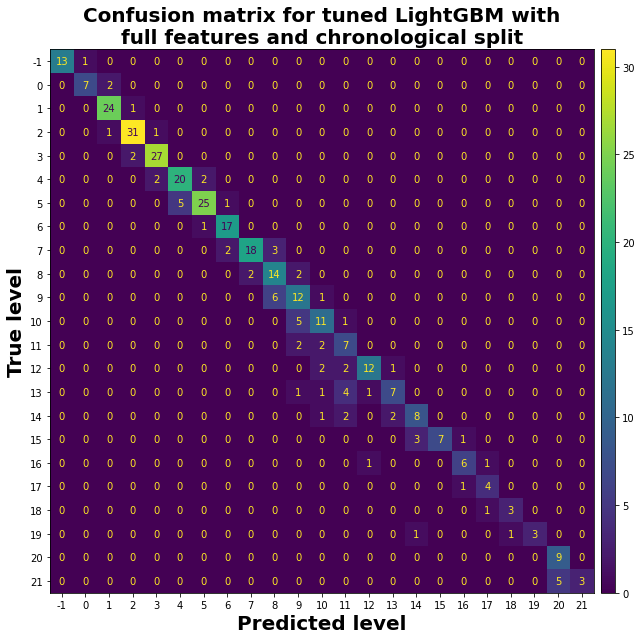

In [29]:
plot_confusion_matrix(
    predict,
    y_test,
    title="Confusion matrix for tuned LightGBM with\nfull features and chronological split",
)

## Random split

In [30]:
import lightgbm as lgb
from sklearn.metrics import mean_squared_error

lgb_train = lgb.Dataset(X_train_random_split, y_train_random_split)
lgb_eval = lgb.Dataset(X_test_random_split, y_test_random_split, reference=lgb_train)

params = {
    "boosting_type": "gbdt",
    "objective": "regression",
    "metric": {"l2", "l1"},
}

gbm = lgb.train(
    params,
    lgb_train,
    num_boost_round=100,
    valid_sets=lgb_eval,
    callbacks=[lgb.early_stopping(stopping_rounds=5)],
)

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001132 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 804
[LightGBM] [Info] Number of data points in the train set: 904, number of used features: 48
[LightGBM] [Info] Start training from score 7.162611
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[75]	valid_0's l2: 0.1379	valid_0's l1: 0.246737


In [31]:
y_pred_train = gbm.predict(X_train_random_split, num_iteration=gbm.best_iteration)
y_pred_test = gbm.predict(X_test_random_split, num_iteration=gbm.best_iteration)

In [32]:
from sklearn.metrics import mean_squared_error, mean_absolute_error


rmse = mean_squared_error(y_test_random_split, y_pred_test, squared=False)
mae = mean_absolute_error(y_test_random_split, y_pred_test)

print(f"RMSE: {rmse:.2f}")
print(f"MAE: {mae:.2f}")

RMSE: 0.37
MAE: 0.25


In [33]:
results.loc[2] = ["random", "default", "full", rmse, mae]

###### MAE by level

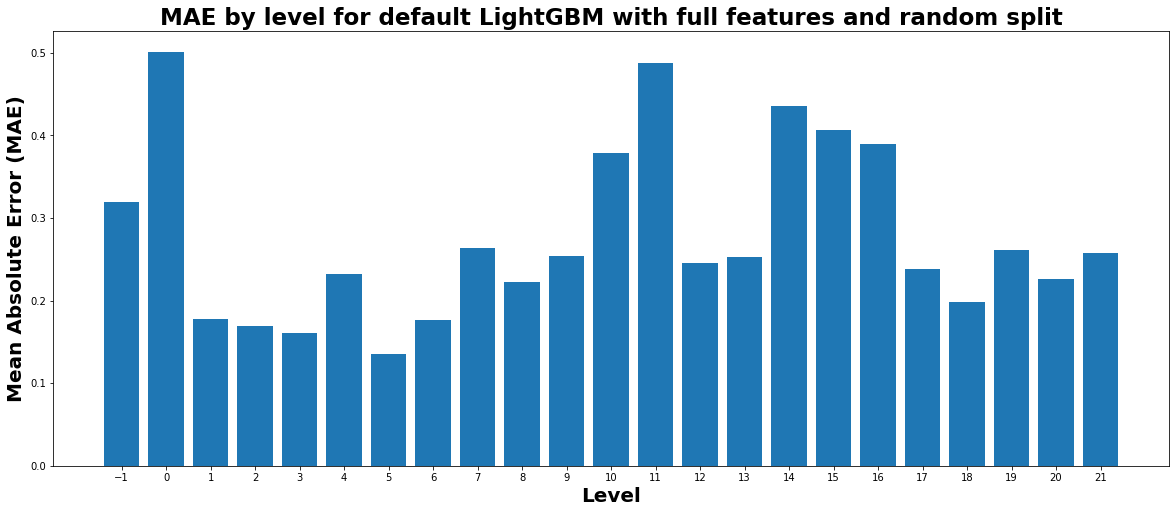

In [34]:
plot_mae_by_level(
    y_test_random_split,
    y_pred_test,
    title="MAE by level for default LightGBM with full features and random split",
)

In [35]:
evaluate_round_predictions([0.5, 0.33, 0.45], y_test_random_split, y_pred_test)

Default:
RMSE: 0.37

Round type: 0.5
RMSE: 0.38

Round type: 0.33
RMSE: 0.43

Round type: 0.45
RMSE: 0.38



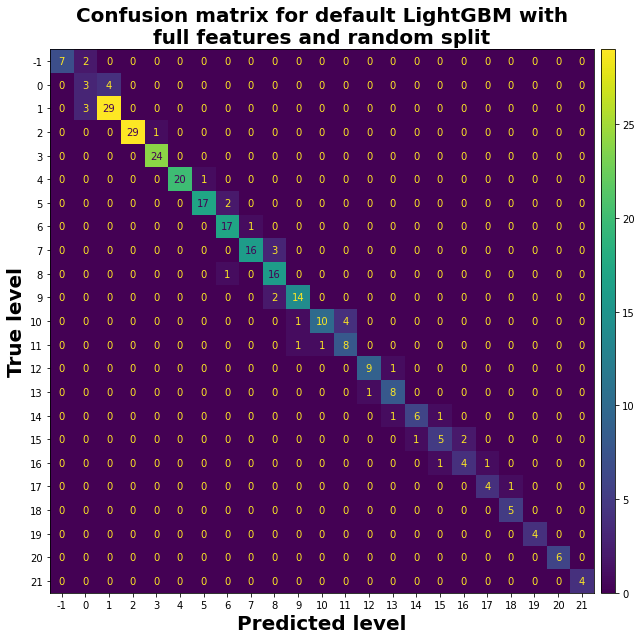

In [36]:
plot_confusion_matrix(
    y_pred_test,
    y_test_random_split,
    title="Confusion matrix for default LightGBM with\nfull features and random split",
)

### Tuning

In [37]:
import optuna.integration.lightgbm as lgb
from lightgbm import early_stopping
from sklearn.model_selection import KFold
from sklearn.model_selection import RepeatedKFold


lgb_train = lgb.Dataset(X_train_random_split, y_train_random_split)

params = {
    "boosting_type": "gbdt",
    "objective": "regression",
    "metric": "l2",
    "verbosity": -1,
}

tuner = lgb.LightGBMTunerCV(
    params,
    lgb_train,
    folds=KFold(n_splits=5),
    num_boost_round=10000,
    callbacks=[early_stopping(100), log_evaluation(100)],
)

tuner.run()

[I 2023-11-09 20:55:01,823] A new study created in memory with name: no-name-169653f4-b68b-4f41-8db8-3a6beb715932
feature_fraction, val_score: inf:   0%|                                                          | 0/7 [00:00<?, ?it/s]

Training until validation scores don't improve for 100 rounds
[100]	cv_agg's l2: 0.169515 + 0.0492299
[200]	cv_agg's l2: 0.165402 + 0.0447806


feature_fraction, val_score: 0.165094:  14%|######4                                      | 1/7 [00:01<00:11,  1.91s/it]

[300]	cv_agg's l2: 0.165329 + 0.0437112
Early stopping, best iteration is:
[225]	cv_agg's l2: 0.165094 + 0.0442879
[100]	cv_agg's l2: 0.159734 + 0.0370272
[200]	cv_agg's l2: 0.157451 + 0.0359185
[300]	cv_agg's l2: 0.15648 + 0.0345154
[400]	cv_agg's l2: 0.155771 + 0.0339543
[500]	cv_agg's l2: 0.155637 + 0.033652
[600]	cv_agg's l2: 0.155531 + 0.0333637


feature_fraction, val_score: 0.155512:  29%|############8                                | 2/7 [00:05<00:15,  3.17s/it]

Early stopping, best iteration is:
[547]	cv_agg's l2: 0.155512 + 0.0334849
[100]	cv_agg's l2: 0.145455 + 0.0275924
[200]	cv_agg's l2: 0.142794 + 0.0270841
[300]	cv_agg's l2: 0.141382 + 0.0269302
[400]	cv_agg's l2: 0.141203 + 0.026856
[500]	cv_agg's l2: 0.140808 + 0.0266109
[600]	cv_agg's l2: 0.140672 + 0.0266882
[700]	cv_agg's l2: 0.140591 + 0.0266084
[800]	cv_agg's l2: 0.14045 + 0.0265713
[900]	cv_agg's l2: 0.14041 + 0.0264855
[1000]	cv_agg's l2: 0.140329 + 0.0264957
[1100]	cv_agg's l2: 0.140274 + 0.0264739
[1200]	cv_agg's l2: 0.140243 + 0.0264855
[1300]	cv_agg's l2: 0.140217 + 0.0265011
[1400]	cv_agg's l2: 0.140184 + 0.0265056
[1500]	cv_agg's l2: 0.140179 + 0.0265192
[1600]	cv_agg's l2: 0.140171 + 0.0265213
[1700]	cv_agg's l2: 0.140164 + 0.0265374


feature_fraction, val_score: 0.140157:  43%|###################2                         | 3/7 [00:16<00:26,  6.53s/it]

Early stopping, best iteration is:
[1633]	cv_agg's l2: 0.140157 + 0.0265161
[100]	cv_agg's l2: 0.147306 + 0.0387148
[200]	cv_agg's l2: 0.144658 + 0.038793
[300]	cv_agg's l2: 0.144182 + 0.0381445
[400]	cv_agg's l2: 0.14359 + 0.0378249
[500]	cv_agg's l2: 0.143443 + 0.037729
[600]	cv_agg's l2: 0.143288 + 0.0376232
[700]	cv_agg's l2: 0.143126 + 0.0374164
[800]	cv_agg's l2: 0.143088 + 0.0373784
[900]	cv_agg's l2: 0.143129 + 0.0373659
[1000]	cv_agg's l2: 0.143117 + 0.0373575
[1100]	cv_agg's l2: 0.143124 + 0.037366
[1200]	cv_agg's l2: 0.14313 + 0.0373389
[1300]	cv_agg's l2: 0.14311 + 0.0373229
[1400]	cv_agg's l2: 0.143132 + 0.0373332
[1500]	cv_agg's l2: 0.14313 + 0.0373087
[1600]	cv_agg's l2: 0.143133 + 0.0373163
[1700]	cv_agg's l2: 0.143155 + 0.0373185
Early stopping, best iteration is:
[1633]	cv_agg's l2: 0.140157 + 0.0265161


feature_fraction, val_score: 0.140157:  57%|#########################7                   | 4/7 [00:29<00:27,  9.20s/it]

[100]	cv_agg's l2: 0.173097 + 0.0409737
[200]	cv_agg's l2: 0.169008 + 0.0385966
[300]	cv_agg's l2: 0.167673 + 0.0377288
[400]	cv_agg's l2: 0.167278 + 0.0375462
[500]	cv_agg's l2: 0.167268 + 0.0373202
[600]	cv_agg's l2: 0.167394 + 0.0372869
[700]	cv_agg's l2: 0.16736 + 0.0372481
[800]	cv_agg's l2: 0.167326 + 0.0372045
[900]	cv_agg's l2: 0.167395 + 0.0372059
[1000]	cv_agg's l2: 0.167431 + 0.0372172
[1100]	cv_agg's l2: 0.167429 + 0.0371871
[1200]	cv_agg's l2: 0.167389 + 0.0371269
[1300]	cv_agg's l2: 0.167389 + 0.0370953
[1400]	cv_agg's l2: 0.167396 + 0.037088
[1500]	cv_agg's l2: 0.167389 + 0.0370612
[1600]	cv_agg's l2: 0.16739 + 0.0370662
[1700]	cv_agg's l2: 0.167397 + 0.0370711
Early stopping, best iteration is:
[1633]	cv_agg's l2: 0.140157 + 0.0265161


feature_fraction, val_score: 0.140157:  71%|################################1            | 5/7 [00:43<00:21, 10.70s/it]

[100]	cv_agg's l2: 0.157507 + 0.0369287
[200]	cv_agg's l2: 0.152981 + 0.0353241
[300]	cv_agg's l2: 0.151559 + 0.0343905
[400]	cv_agg's l2: 0.151006 + 0.0337403
[500]	cv_agg's l2: 0.150692 + 0.0334611
[600]	cv_agg's l2: 0.150528 + 0.0331037
[700]	cv_agg's l2: 0.150413 + 0.033057
[800]	cv_agg's l2: 0.150316 + 0.0328866
[900]	cv_agg's l2: 0.150342 + 0.032828
[1000]	cv_agg's l2: 0.150286 + 0.0328382
[1100]	cv_agg's l2: 0.1503 + 0.0328045
[1200]	cv_agg's l2: 0.150304 + 0.0328003
[1300]	cv_agg's l2: 0.150329 + 0.0328102
[1400]	cv_agg's l2: 0.150328 + 0.0328052
[1500]	cv_agg's l2: 0.150335 + 0.0327903
[1600]	cv_agg's l2: 0.150341 + 0.0327967
[1700]	cv_agg's l2: 0.150356 + 0.032798


feature_fraction, val_score: 0.140157:  86%|######################################5      | 6/7 [00:54<00:10, 10.88s/it]

Early stopping, best iteration is:
[1633]	cv_agg's l2: 0.140157 + 0.0265161
[100]	cv_agg's l2: 0.173738 + 0.0459502
[200]	cv_agg's l2: 0.170098 + 0.044718
[300]	cv_agg's l2: 0.169105 + 0.044108
[400]	cv_agg's l2: 0.168228 + 0.0437707
[500]	cv_agg's l2: 0.168099 + 0.0436623
[600]	cv_agg's l2: 0.168024 + 0.043369
[700]	cv_agg's l2: 0.167951 + 0.0431419
[800]	cv_agg's l2: 0.167773 + 0.0429654
[900]	cv_agg's l2: 0.16768 + 0.0428228
[1000]	cv_agg's l2: 0.167591 + 0.042757
[1100]	cv_agg's l2: 0.167557 + 0.0427185
[1200]	cv_agg's l2: 0.167505 + 0.0426435
[1300]	cv_agg's l2: 0.16748 + 0.0426389
[1400]	cv_agg's l2: 0.167468 + 0.042634
[1500]	cv_agg's l2: 0.167464 + 0.0426405
[1600]	cv_agg's l2: 0.167454 + 0.042634
[1700]	cv_agg's l2: 0.167462 + 0.0426332


feature_fraction, val_score: 0.140157: 100%|#############################################| 7/7 [01:07<00:00,  9.61s/it]


Early stopping, best iteration is:
[1633]	cv_agg's l2: 0.140157 + 0.0265161


num_leaves, val_score: 0.140157:   0%|                                                          | 0/20 [00:00<?, ?it/s]

[100]	cv_agg's l2: 0.145455 + 0.0275924
[200]	cv_agg's l2: 0.142794 + 0.0270841
[300]	cv_agg's l2: 0.141382 + 0.0269302
[400]	cv_agg's l2: 0.141203 + 0.026856
[500]	cv_agg's l2: 0.140808 + 0.0266109
[600]	cv_agg's l2: 0.140672 + 0.0266882
[700]	cv_agg's l2: 0.140591 + 0.0266084
[800]	cv_agg's l2: 0.14045 + 0.0265713
[900]	cv_agg's l2: 0.14041 + 0.0264855
[1000]	cv_agg's l2: 0.140329 + 0.0264957
[1100]	cv_agg's l2: 0.140273 + 0.0264746
[1200]	cv_agg's l2: 0.140241 + 0.0264872
[1300]	cv_agg's l2: 0.140217 + 0.0265011
[1400]	cv_agg's l2: 0.140188 + 0.0265016
[1500]	cv_agg's l2: 0.140187 + 0.0265119
[1600]	cv_agg's l2: 0.140185 + 0.0265079
[1700]	cv_agg's l2: 0.140178 + 0.0265253
Early stopping, best iteration is:
[1633]	cv_agg's l2: 0.140157 + 0.0265161


num_leaves, val_score: 0.140157:   5%|##5                                               | 1/20 [00:11<03:47, 12.00s/it]

[100]	cv_agg's l2: 0.145455 + 0.0275924
[200]	cv_agg's l2: 0.142794 + 0.0270841
[300]	cv_agg's l2: 0.141382 + 0.0269302
[400]	cv_agg's l2: 0.141203 + 0.026856
[500]	cv_agg's l2: 0.140808 + 0.0266109
[600]	cv_agg's l2: 0.140672 + 0.0266882
[700]	cv_agg's l2: 0.140591 + 0.0266084
[800]	cv_agg's l2: 0.14045 + 0.0265713
[900]	cv_agg's l2: 0.14041 + 0.0264855
[1000]	cv_agg's l2: 0.140329 + 0.0264957
[1100]	cv_agg's l2: 0.140273 + 0.0264746
[1200]	cv_agg's l2: 0.140241 + 0.0264872
[1300]	cv_agg's l2: 0.140217 + 0.0265011
[1400]	cv_agg's l2: 0.140188 + 0.0265016
[1500]	cv_agg's l2: 0.140187 + 0.0265119
[1600]	cv_agg's l2: 0.140185 + 0.0265079
[1700]	cv_agg's l2: 0.140178 + 0.0265253


num_leaves, val_score: 0.140157:  10%|#####                                             | 2/20 [00:25<03:50, 12.80s/it]

Early stopping, best iteration is:
[1633]	cv_agg's l2: 0.140157 + 0.0265161
[100]	cv_agg's l2: 0.145455 + 0.0275924
[200]	cv_agg's l2: 0.142794 + 0.0270841
[300]	cv_agg's l2: 0.141382 + 0.0269302
[400]	cv_agg's l2: 0.141203 + 0.026856
[500]	cv_agg's l2: 0.140808 + 0.0266109
[600]	cv_agg's l2: 0.140672 + 0.0266882
[700]	cv_agg's l2: 0.140591 + 0.0266084
[800]	cv_agg's l2: 0.14045 + 0.0265713
[900]	cv_agg's l2: 0.14041 + 0.0264855
[1000]	cv_agg's l2: 0.140329 + 0.0264957
[1100]	cv_agg's l2: 0.140273 + 0.0264746
[1200]	cv_agg's l2: 0.140241 + 0.0264872
[1300]	cv_agg's l2: 0.140217 + 0.0265011
[1400]	cv_agg's l2: 0.140188 + 0.0265016
[1500]	cv_agg's l2: 0.140187 + 0.0265119
[1600]	cv_agg's l2: 0.140185 + 0.0265079
[1700]	cv_agg's l2: 0.140178 + 0.0265253


num_leaves, val_score: 0.140157:  15%|#######5                                          | 3/20 [00:37<03:31, 12.45s/it]

Early stopping, best iteration is:
[1633]	cv_agg's l2: 0.140157 + 0.0265161
[100]	cv_agg's l2: 0.145455 + 0.0275924
[200]	cv_agg's l2: 0.142794 + 0.0270841
[300]	cv_agg's l2: 0.141382 + 0.0269302
[400]	cv_agg's l2: 0.141203 + 0.026856
[500]	cv_agg's l2: 0.140808 + 0.0266109
[600]	cv_agg's l2: 0.140672 + 0.0266882
[700]	cv_agg's l2: 0.140591 + 0.0266084
[800]	cv_agg's l2: 0.14045 + 0.0265713
[900]	cv_agg's l2: 0.14041 + 0.0264855
[1000]	cv_agg's l2: 0.140329 + 0.0264957
[1100]	cv_agg's l2: 0.140273 + 0.0264746
[1200]	cv_agg's l2: 0.140241 + 0.0264872
[1300]	cv_agg's l2: 0.140217 + 0.0265011
[1400]	cv_agg's l2: 0.140188 + 0.0265016
[1500]	cv_agg's l2: 0.140187 + 0.0265119
[1600]	cv_agg's l2: 0.140185 + 0.0265079
[1700]	cv_agg's l2: 0.140178 + 0.0265253


num_leaves, val_score: 0.140157:  20%|##########                                        | 4/20 [00:53<03:42, 13.93s/it]

Early stopping, best iteration is:
[1633]	cv_agg's l2: 0.140157 + 0.0265161
[100]	cv_agg's l2: 0.145761 + 0.0305625
[200]	cv_agg's l2: 0.141154 + 0.0296949
[300]	cv_agg's l2: 0.140377 + 0.0288054
[400]	cv_agg's l2: 0.13925 + 0.028792
[500]	cv_agg's l2: 0.138844 + 0.0284532
[600]	cv_agg's l2: 0.138625 + 0.0281051
[700]	cv_agg's l2: 0.138585 + 0.0279351


num_leaves, val_score: 0.138475:  25%|############5                                     | 5/20 [00:58<02:38, 10.57s/it]

[800]	cv_agg's l2: 0.138557 + 0.027803
Early stopping, best iteration is:
[730]	cv_agg's l2: 0.138475 + 0.0279588
[100]	cv_agg's l2: 0.210876 + 0.054475
[200]	cv_agg's l2: 0.187903 + 0.0540914
[300]	cv_agg's l2: 0.175145 + 0.0505239
[400]	cv_agg's l2: 0.170649 + 0.0483571
[500]	cv_agg's l2: 0.167903 + 0.0462654
[600]	cv_agg's l2: 0.164798 + 0.0450096
[700]	cv_agg's l2: 0.163101 + 0.0430478


num_leaves, val_score: 0.138475:  30%|###############                                   | 6/20 [01:00<01:48,  7.77s/it]

[800]	cv_agg's l2: 0.161607 + 0.0419095
Early stopping, best iteration is:
[730]	cv_agg's l2: 0.138475 + 0.0279588
[100]	cv_agg's l2: 0.145455 + 0.0275924
[200]	cv_agg's l2: 0.142794 + 0.0270841
[300]	cv_agg's l2: 0.141382 + 0.0269302
[400]	cv_agg's l2: 0.141203 + 0.026856
[500]	cv_agg's l2: 0.140808 + 0.0266109
[600]	cv_agg's l2: 0.140672 + 0.0266882
[700]	cv_agg's l2: 0.140591 + 0.0266084
[800]	cv_agg's l2: 0.14045 + 0.0265713


num_leaves, val_score: 0.138475:  35%|#################5                                | 7/20 [01:06<01:35,  7.34s/it]

Early stopping, best iteration is:
[730]	cv_agg's l2: 0.138475 + 0.0279588
[100]	cv_agg's l2: 0.145455 + 0.0275924
[200]	cv_agg's l2: 0.142794 + 0.0270841
[300]	cv_agg's l2: 0.141382 + 0.0269302
[400]	cv_agg's l2: 0.141203 + 0.026856
[500]	cv_agg's l2: 0.140808 + 0.0266109
[600]	cv_agg's l2: 0.140672 + 0.0266882
[700]	cv_agg's l2: 0.140591 + 0.0266084
[800]	cv_agg's l2: 0.14045 + 0.0265713


num_leaves, val_score: 0.138475:  40%|####################                              | 8/20 [01:13<01:25,  7.15s/it]

Early stopping, best iteration is:
[730]	cv_agg's l2: 0.138475 + 0.0279588
[100]	cv_agg's l2: 0.145455 + 0.0275924
[200]	cv_agg's l2: 0.142794 + 0.0270841
[300]	cv_agg's l2: 0.141382 + 0.0269302
[400]	cv_agg's l2: 0.141203 + 0.026856
[500]	cv_agg's l2: 0.140808 + 0.0266109
[600]	cv_agg's l2: 0.140672 + 0.0266882
[700]	cv_agg's l2: 0.140591 + 0.0266084
[800]	cv_agg's l2: 0.14045 + 0.0265713


num_leaves, val_score: 0.138475:  45%|######################5                           | 9/20 [01:21<01:19,  7.21s/it]

Early stopping, best iteration is:
[730]	cv_agg's l2: 0.138475 + 0.0279588
[100]	cv_agg's l2: 0.145455 + 0.0275924
[200]	cv_agg's l2: 0.142794 + 0.0270841
[300]	cv_agg's l2: 0.141382 + 0.0269302
[400]	cv_agg's l2: 0.141203 + 0.026856
[500]	cv_agg's l2: 0.140808 + 0.0266109
[600]	cv_agg's l2: 0.140672 + 0.0266882
[700]	cv_agg's l2: 0.140591 + 0.0266084
[800]	cv_agg's l2: 0.14045 + 0.0265713


num_leaves, val_score: 0.138475:  50%|########################5                        | 10/20 [01:26<01:07,  6.79s/it]

Early stopping, best iteration is:
[730]	cv_agg's l2: 0.138475 + 0.0279588
[100]	cv_agg's l2: 0.145455 + 0.0275924
[200]	cv_agg's l2: 0.142794 + 0.0270841
[300]	cv_agg's l2: 0.141382 + 0.0269302
[400]	cv_agg's l2: 0.141203 + 0.026856
[500]	cv_agg's l2: 0.140808 + 0.0266109
[600]	cv_agg's l2: 0.140672 + 0.0266882
[700]	cv_agg's l2: 0.140591 + 0.0266084
[800]	cv_agg's l2: 0.14045 + 0.0265713
Early stopping, best iteration is:
[730]	cv_agg's l2: 0.138475 + 0.0279588


num_leaves, val_score: 0.138475:  55%|##########################9                      | 11/20 [01:32<00:58,  6.45s/it]

[100]	cv_agg's l2: 0.246016 + 0.0512017
[200]	cv_agg's l2: 0.212157 + 0.0432642
[300]	cv_agg's l2: 0.196074 + 0.0400315
[400]	cv_agg's l2: 0.187026 + 0.037179
[500]	cv_agg's l2: 0.180159 + 0.0365284
[600]	cv_agg's l2: 0.176475 + 0.0353521
[700]	cv_agg's l2: 0.173288 + 0.0348211


num_leaves, val_score: 0.138475:  60%|#############################4                   | 12/20 [01:34<00:41,  5.13s/it]

[800]	cv_agg's l2: 0.171101 + 0.0335858
Early stopping, best iteration is:
[730]	cv_agg's l2: 0.138475 + 0.0279588
[100]	cv_agg's l2: 0.145455 + 0.0275924
[200]	cv_agg's l2: 0.142794 + 0.0270841
[300]	cv_agg's l2: 0.141382 + 0.0269302
[400]	cv_agg's l2: 0.141203 + 0.026856
[500]	cv_agg's l2: 0.140808 + 0.0266109
[600]	cv_agg's l2: 0.140672 + 0.0266882
[700]	cv_agg's l2: 0.140591 + 0.0266084
[800]	cv_agg's l2: 0.14045 + 0.0265713


num_leaves, val_score: 0.138475:  65%|###############################8                 | 13/20 [01:41<00:38,  5.50s/it]

Early stopping, best iteration is:
[730]	cv_agg's l2: 0.138475 + 0.0279588
[100]	cv_agg's l2: 0.145455 + 0.0275924
[200]	cv_agg's l2: 0.142794 + 0.0270841
[300]	cv_agg's l2: 0.141382 + 0.0269302
[400]	cv_agg's l2: 0.141203 + 0.026856
[500]	cv_agg's l2: 0.140808 + 0.0266109
[600]	cv_agg's l2: 0.140672 + 0.0266882
[700]	cv_agg's l2: 0.140591 + 0.0266084
[800]	cv_agg's l2: 0.14045 + 0.0265713
Early stopping, best iteration is:
[730]	cv_agg's l2: 0.138475 + 0.0279588


num_leaves, val_score: 0.138475:  70%|##################################3              | 14/20 [01:47<00:34,  5.68s/it]

[100]	cv_agg's l2: 0.145455 + 0.0275924
[200]	cv_agg's l2: 0.142794 + 0.0270841
[300]	cv_agg's l2: 0.141382 + 0.0269302
[400]	cv_agg's l2: 0.141203 + 0.026856
[500]	cv_agg's l2: 0.140808 + 0.0266109
[600]	cv_agg's l2: 0.140672 + 0.0266882
[700]	cv_agg's l2: 0.140591 + 0.0266084
[800]	cv_agg's l2: 0.14045 + 0.0265713


num_leaves, val_score: 0.138475:  75%|####################################7            | 15/20 [01:53<00:28,  5.75s/it]

Early stopping, best iteration is:
[730]	cv_agg's l2: 0.138475 + 0.0279588
[100]	cv_agg's l2: 0.145455 + 0.0275924
[200]	cv_agg's l2: 0.142794 + 0.0270841
[300]	cv_agg's l2: 0.141382 + 0.0269302
[400]	cv_agg's l2: 0.141203 + 0.026856
[500]	cv_agg's l2: 0.140808 + 0.0266109
[600]	cv_agg's l2: 0.140672 + 0.0266882
[700]	cv_agg's l2: 0.140591 + 0.0266084
[800]	cv_agg's l2: 0.14045 + 0.0265713


num_leaves, val_score: 0.138475:  80%|#######################################2         | 16/20 [01:58<00:22,  5.72s/it]

Early stopping, best iteration is:
[730]	cv_agg's l2: 0.138475 + 0.0279588
[100]	cv_agg's l2: 0.145455 + 0.0275924
[200]	cv_agg's l2: 0.142794 + 0.0270841
[300]	cv_agg's l2: 0.141382 + 0.0269302
[400]	cv_agg's l2: 0.141203 + 0.026856
[500]	cv_agg's l2: 0.140808 + 0.0266109
[600]	cv_agg's l2: 0.140672 + 0.0266882
[700]	cv_agg's l2: 0.140591 + 0.0266084


num_leaves, val_score: 0.138475:  80%|#######################################2         | 16/20 [02:04<00:22,  5.72s/it]

[800]	cv_agg's l2: 0.14045 + 0.0265713
Early stopping, best iteration is:
[730]	cv_agg's l2: 0.138475 + 0.0279588


num_leaves, val_score: 0.138475:  85%|#########################################6       | 17/20 [02:04<00:16,  5.61s/it]

[100]	cv_agg's l2: 0.145455 + 0.0275924
[200]	cv_agg's l2: 0.142794 + 0.0270841
[300]	cv_agg's l2: 0.141382 + 0.0269302
[400]	cv_agg's l2: 0.141203 + 0.026856
[500]	cv_agg's l2: 0.140808 + 0.0266109
[600]	cv_agg's l2: 0.140672 + 0.0266882
[700]	cv_agg's l2: 0.140591 + 0.0266084
[800]	cv_agg's l2: 0.14045 + 0.0265713


num_leaves, val_score: 0.138475:  90%|############################################1    | 18/20 [02:11<00:12,  6.15s/it]

Early stopping, best iteration is:
[730]	cv_agg's l2: 0.138475 + 0.0279588
[100]	cv_agg's l2: 0.145094 + 0.0247873
[200]	cv_agg's l2: 0.141908 + 0.0247366
[300]	cv_agg's l2: 0.141169 + 0.0244367
[400]	cv_agg's l2: 0.141082 + 0.0243378
[500]	cv_agg's l2: 0.141015 + 0.0244693
[600]	cv_agg's l2: 0.140877 + 0.0245308
[700]	cv_agg's l2: 0.140794 + 0.0245948
[800]	cv_agg's l2: 0.140654 + 0.0245899
Early stopping, best iteration is:
[730]	cv_agg's l2: 0.138475 + 0.0279588


num_leaves, val_score: 0.138475:  95%|##############################################5  | 19/20 [02:17<00:06,  6.05s/it]

[100]	cv_agg's l2: 0.145455 + 0.0275924
[200]	cv_agg's l2: 0.142794 + 0.0270841
[300]	cv_agg's l2: 0.141382 + 0.0269302
[400]	cv_agg's l2: 0.141203 + 0.026856
[500]	cv_agg's l2: 0.140808 + 0.0266109
[600]	cv_agg's l2: 0.140672 + 0.0266882
[700]	cv_agg's l2: 0.140591 + 0.0266084
[800]	cv_agg's l2: 0.14045 + 0.0265713
Early stopping, best iteration is:
[730]	cv_agg's l2: 0.138475 + 0.0279588


bagging, val_score: 0.138475:   0%|                                                             | 0/10 [00:00<?, ?it/s]

[100]	cv_agg's l2: 0.171085 + 0.0257379
[200]	cv_agg's l2: 0.163345 + 0.0252202
[300]	cv_agg's l2: 0.159739 + 0.0209135
[400]	cv_agg's l2: 0.156343 + 0.019624
[500]	cv_agg's l2: 0.157113 + 0.0192623
[600]	cv_agg's l2: 0.155203 + 0.0190747
[700]	cv_agg's l2: 0.154947 + 0.0191372


bagging, val_score: 0.138475:  10%|#####3                                               | 1/10 [00:03<00:34,  3.87s/it]

[800]	cv_agg's l2: 0.154633 + 0.0196971
Early stopping, best iteration is:
[730]	cv_agg's l2: 0.138475 + 0.0279588
[100]	cv_agg's l2: 0.144159 + 0.035459
[200]	cv_agg's l2: 0.138727 + 0.0329252
[300]	cv_agg's l2: 0.136822 + 0.0334194


bagging, val_score: 0.136585:  20%|##########6                                          | 2/10 [00:05<00:21,  2.73s/it]

[400]	cv_agg's l2: 0.136825 + 0.0329389
Early stopping, best iteration is:
[317]	cv_agg's l2: 0.136585 + 0.0333627
[100]	cv_agg's l2: 0.148123 + 0.0313514
[200]	cv_agg's l2: 0.143892 + 0.0302308
[300]	cv_agg's l2: 0.141989 + 0.030004


bagging, val_score: 0.136585:  30%|###############9                                     | 3/10 [00:07<00:16,  2.38s/it]

[400]	cv_agg's l2: 0.14122 + 0.029949
Early stopping, best iteration is:
[317]	cv_agg's l2: 0.136585 + 0.0333627
[100]	cv_agg's l2: 0.14901 + 0.0352049
[200]	cv_agg's l2: 0.143671 + 0.0318607
[300]	cv_agg's l2: 0.142005 + 0.0312605


bagging, val_score: 0.136585:  40%|#####################2                               | 4/10 [00:09<00:13,  2.31s/it]

[400]	cv_agg's l2: 0.141272 + 0.0314962
Early stopping, best iteration is:
[317]	cv_agg's l2: 0.136585 + 0.0333627
[100]	cv_agg's l2: 0.211981 + 0.0264968
[200]	cv_agg's l2: 0.204472 + 0.0205901
[300]	cv_agg's l2: 0.200892 + 0.0153329


bagging, val_score: 0.136585:  50%|##########################5                          | 5/10 [00:11<00:10,  2.06s/it]

[400]	cv_agg's l2: 0.197877 + 0.0140883
Early stopping, best iteration is:
[317]	cv_agg's l2: 0.136585 + 0.0333627
[100]	cv_agg's l2: 0.158032 + 0.0297643
[200]	cv_agg's l2: 0.150723 + 0.0295177
[300]	cv_agg's l2: 0.148474 + 0.0294852


bagging, val_score: 0.136585:  60%|###############################8                     | 6/10 [00:13<00:08,  2.09s/it]

[400]	cv_agg's l2: 0.146956 + 0.0286569
Early stopping, best iteration is:
[317]	cv_agg's l2: 0.136585 + 0.0333627
[100]	cv_agg's l2: 0.155625 + 0.0319049
[200]	cv_agg's l2: 0.14741 + 0.029578
[300]	cv_agg's l2: 0.145835 + 0.0289565


bagging, val_score: 0.136585:  70%|#####################################                | 7/10 [00:15<00:06,  2.10s/it]

[400]	cv_agg's l2: 0.145443 + 0.0289336
Early stopping, best iteration is:
[317]	cv_agg's l2: 0.136585 + 0.0333627
[100]	cv_agg's l2: 0.153507 + 0.0336038
[200]	cv_agg's l2: 0.148709 + 0.0340207
[300]	cv_agg's l2: 0.146414 + 0.0322414


bagging, val_score: 0.136585:  80%|##########################################4          | 8/10 [00:18<00:04,  2.13s/it]

[400]	cv_agg's l2: 0.145838 + 0.0318988
Early stopping, best iteration is:
[317]	cv_agg's l2: 0.136585 + 0.0333627
[100]	cv_agg's l2: 0.161942 + 0.0283598
[200]	cv_agg's l2: 0.153135 + 0.0272305
[300]	cv_agg's l2: 0.150852 + 0.0274247


bagging, val_score: 0.136585:  90%|###############################################7     | 9/10 [00:20<00:02,  2.15s/it]

[400]	cv_agg's l2: 0.149801 + 0.0260204
Early stopping, best iteration is:
[317]	cv_agg's l2: 0.136585 + 0.0333627
[100]	cv_agg's l2: 0.154503 + 0.0352418
[200]	cv_agg's l2: 0.149268 + 0.033681
[300]	cv_agg's l2: 0.14648 + 0.0329423


bagging, val_score: 0.136585: 100%|####################################################| 10/10 [00:22<00:00,  2.23s/it]


[400]	cv_agg's l2: 0.145665 + 0.0327155
Early stopping, best iteration is:
[317]	cv_agg's l2: 0.136585 + 0.0333627


feature_fraction_stage2, val_score: 0.136585:   0%|                                              | 0/3 [00:00<?, ?it/s]

[100]	cv_agg's l2: 0.148095 + 0.0380479
[200]	cv_agg's l2: 0.144505 + 0.0371212
[300]	cv_agg's l2: 0.143192 + 0.0367894


feature_fraction_stage2, val_score: 0.136585:  33%|############6                         | 1/3 [00:01<00:03,  1.89s/it]

[400]	cv_agg's l2: 0.143209 + 0.0369106
Early stopping, best iteration is:
[317]	cv_agg's l2: 0.136585 + 0.0333627
[100]	cv_agg's l2: 0.141754 + 0.0339256
[200]	cv_agg's l2: 0.13845 + 0.0312306
[300]	cv_agg's l2: 0.137935 + 0.0301985


feature_fraction_stage2, val_score: 0.136585:  67%|#########################3            | 2/3 [00:03<00:01,  1.87s/it]

[400]	cv_agg's l2: 0.137747 + 0.0296259
Early stopping, best iteration is:
[317]	cv_agg's l2: 0.136585 + 0.0333627
[100]	cv_agg's l2: 0.148972 + 0.0434202
[200]	cv_agg's l2: 0.14506 + 0.0411449
[300]	cv_agg's l2: 0.143021 + 0.0400701


feature_fraction_stage2, val_score: 0.136585: 100%|######################################| 3/3 [00:05<00:00,  1.87s/it]


[400]	cv_agg's l2: 0.142655 + 0.040076
Early stopping, best iteration is:
[317]	cv_agg's l2: 0.136585 + 0.0333627


regularization_factors, val_score: 0.136585:   0%|                                              | 0/20 [00:00<?, ?it/s]

[100]	cv_agg's l2: 0.14418 + 0.0354585
[200]	cv_agg's l2: 0.139468 + 0.0330071
[300]	cv_agg's l2: 0.137735 + 0.0335742


regularization_factors, val_score: 0.136585:   5%|#9                                    | 1/20 [00:01<00:36,  1.93s/it]

[400]	cv_agg's l2: 0.137936 + 0.0331563
Early stopping, best iteration is:
[317]	cv_agg's l2: 0.136585 + 0.0333627
[100]	cv_agg's l2: 0.14418 + 0.0354585
[200]	cv_agg's l2: 0.139468 + 0.0330071
[300]	cv_agg's l2: 0.137735 + 0.0335742


regularization_factors, val_score: 0.136585:  10%|###8                                  | 2/20 [00:03<00:34,  1.90s/it]

[400]	cv_agg's l2: 0.137936 + 0.0331563
Early stopping, best iteration is:
[317]	cv_agg's l2: 0.136585 + 0.0333627
[100]	cv_agg's l2: 0.14418 + 0.0354585
[200]	cv_agg's l2: 0.139468 + 0.0330071
[300]	cv_agg's l2: 0.137735 + 0.0335742


regularization_factors, val_score: 0.136585:  15%|#####7                                | 3/20 [00:05<00:32,  1.90s/it]

[400]	cv_agg's l2: 0.137936 + 0.0331563
Early stopping, best iteration is:
[317]	cv_agg's l2: 0.136585 + 0.0333627
[100]	cv_agg's l2: 0.14418 + 0.0354585
[200]	cv_agg's l2: 0.139468 + 0.0330071
[300]	cv_agg's l2: 0.137735 + 0.0335742


regularization_factors, val_score: 0.136585:  20%|#######6                              | 4/20 [00:07<00:30,  1.90s/it]

[400]	cv_agg's l2: 0.137936 + 0.0331563
Early stopping, best iteration is:
[317]	cv_agg's l2: 0.136585 + 0.0333627
[100]	cv_agg's l2: 0.14418 + 0.0354585
[200]	cv_agg's l2: 0.139468 + 0.0330071
[300]	cv_agg's l2: 0.137735 + 0.0335742


regularization_factors, val_score: 0.136585:  25%|#########5                            | 5/20 [00:09<00:28,  1.93s/it]

[400]	cv_agg's l2: 0.137936 + 0.0331563
Early stopping, best iteration is:
[317]	cv_agg's l2: 0.136585 + 0.0333627
[100]	cv_agg's l2: 0.14418 + 0.0354585
[200]	cv_agg's l2: 0.139468 + 0.0330071
[300]	cv_agg's l2: 0.137735 + 0.0335742


regularization_factors, val_score: 0.136585:  30%|###########4                          | 6/20 [00:11<00:27,  1.94s/it]

[400]	cv_agg's l2: 0.137936 + 0.0331563
Early stopping, best iteration is:
[317]	cv_agg's l2: 0.136585 + 0.0333627
[100]	cv_agg's l2: 0.143724 + 0.0357997
[200]	cv_agg's l2: 0.139598 + 0.035685
[300]	cv_agg's l2: 0.137805 + 0.0355215


regularization_factors, val_score: 0.136585:  35%|#############3                        | 7/20 [00:13<00:25,  1.95s/it]

[400]	cv_agg's l2: 0.137206 + 0.0358264
Early stopping, best iteration is:
[317]	cv_agg's l2: 0.136585 + 0.0333627
[100]	cv_agg's l2: 0.144209 + 0.0371086
[200]	cv_agg's l2: 0.139447 + 0.0346606
[300]	cv_agg's l2: 0.137073 + 0.033608
[400]	cv_agg's l2: 0.135938 + 0.0326871
[500]	cv_agg's l2: 0.135458 + 0.0326886


regularization_factors, val_score: 0.135270:  40%|###############2                      | 8/20 [00:16<00:25,  2.16s/it]

Early stopping, best iteration is:
[467]	cv_agg's l2: 0.13527 + 0.0325392
[100]	cv_agg's l2: 0.143868 + 0.0364801
[200]	cv_agg's l2: 0.137995 + 0.0341859
[300]	cv_agg's l2: 0.136916 + 0.0333202
[400]	cv_agg's l2: 0.136064 + 0.0326467
[500]	cv_agg's l2: 0.135732 + 0.0321719


regularization_factors, val_score: 0.135270:  45%|#################1                    | 9/20 [00:18<00:25,  2.31s/it]

Early stopping, best iteration is:
[467]	cv_agg's l2: 0.13527 + 0.0325392
[100]	cv_agg's l2: 0.144721 + 0.0372798
[200]	cv_agg's l2: 0.139369 + 0.0349598
[300]	cv_agg's l2: 0.138167 + 0.0332051
[400]	cv_agg's l2: 0.13763 + 0.0329995
[500]	cv_agg's l2: 0.137223 + 0.0323479


regularization_factors, val_score: 0.135270:  50%|##################5                  | 10/20 [00:22<00:26,  2.63s/it]

Early stopping, best iteration is:
[467]	cv_agg's l2: 0.13527 + 0.0325392
[100]	cv_agg's l2: 0.145065 + 0.0350915
[200]	cv_agg's l2: 0.139221 + 0.0327223
[300]	cv_agg's l2: 0.137603 + 0.0320249
[400]	cv_agg's l2: 0.137151 + 0.0314917
[500]	cv_agg's l2: 0.136123 + 0.0311133


regularization_factors, val_score: 0.135270:  55%|####################3                | 11/20 [00:25<00:25,  2.79s/it]

Early stopping, best iteration is:
[467]	cv_agg's l2: 0.13527 + 0.0325392
[100]	cv_agg's l2: 0.145206 + 0.0353581
[200]	cv_agg's l2: 0.13961 + 0.03391
[300]	cv_agg's l2: 0.13882 + 0.0336912
[400]	cv_agg's l2: 0.138322 + 0.0336503
[500]	cv_agg's l2: 0.138156 + 0.0333239


regularization_factors, val_score: 0.135270:  60%|######################2              | 12/20 [00:28<00:23,  2.90s/it]

Early stopping, best iteration is:
[467]	cv_agg's l2: 0.13527 + 0.0325392
[100]	cv_agg's l2: 0.143872 + 0.0364611
[200]	cv_agg's l2: 0.138885 + 0.0339648
[300]	cv_agg's l2: 0.137009 + 0.0333773
[400]	cv_agg's l2: 0.136062 + 0.0330073
[500]	cv_agg's l2: 0.135552 + 0.0329733


regularization_factors, val_score: 0.135270:  65%|########################             | 13/20 [00:31<00:19,  2.82s/it]

Early stopping, best iteration is:
[467]	cv_agg's l2: 0.13527 + 0.0325392
[100]	cv_agg's l2: 0.143306 + 0.0337118
[200]	cv_agg's l2: 0.137684 + 0.0326277
[300]	cv_agg's l2: 0.136405 + 0.0329866
[400]	cv_agg's l2: 0.136311 + 0.033257
[500]	cv_agg's l2: 0.136419 + 0.0330874


regularization_factors, val_score: 0.135270:  70%|#########################9           | 14/20 [00:33<00:16,  2.75s/it]

Early stopping, best iteration is:
[467]	cv_agg's l2: 0.13527 + 0.0325392
[100]	cv_agg's l2: 0.147392 + 0.0314461
[200]	cv_agg's l2: 0.141199 + 0.0299383
[300]	cv_agg's l2: 0.140208 + 0.0304255
[400]	cv_agg's l2: 0.139348 + 0.0303016
[500]	cv_agg's l2: 0.139273 + 0.0301141


regularization_factors, val_score: 0.135270:  75%|###########################7         | 15/20 [00:36<00:13,  2.71s/it]

Early stopping, best iteration is:
[467]	cv_agg's l2: 0.13527 + 0.0325392
[100]	cv_agg's l2: 0.144204 + 0.0371274
[200]	cv_agg's l2: 0.138922 + 0.0349219
[300]	cv_agg's l2: 0.137468 + 0.0332939
[400]	cv_agg's l2: 0.137134 + 0.0329312
[500]	cv_agg's l2: 0.136736 + 0.0323765


regularization_factors, val_score: 0.135270:  80%|#############################6       | 16/20 [00:38<00:10,  2.67s/it]

Early stopping, best iteration is:
[467]	cv_agg's l2: 0.13527 + 0.0325392
[100]	cv_agg's l2: 0.147792 + 0.0336593
[200]	cv_agg's l2: 0.141493 + 0.0314745
[300]	cv_agg's l2: 0.139591 + 0.030744
[400]	cv_agg's l2: 0.138993 + 0.03037
[500]	cv_agg's l2: 0.139101 + 0.030607


regularization_factors, val_score: 0.135270:  85%|###############################4     | 17/20 [00:41<00:07,  2.64s/it]

Early stopping, best iteration is:
[467]	cv_agg's l2: 0.13527 + 0.0325392
[100]	cv_agg's l2: 0.143724 + 0.0357995
[200]	cv_agg's l2: 0.139434 + 0.035586
[300]	cv_agg's l2: 0.137509 + 0.0349367
[400]	cv_agg's l2: 0.137177 + 0.0350976
[500]	cv_agg's l2: 0.137082 + 0.0348201


regularization_factors, val_score: 0.135270:  90%|#################################3   | 18/20 [00:43<00:05,  2.62s/it]

Early stopping, best iteration is:
[467]	cv_agg's l2: 0.13527 + 0.0325392
[100]	cv_agg's l2: 0.152215 + 0.0318694
[200]	cv_agg's l2: 0.14598 + 0.0318927
[300]	cv_agg's l2: 0.144761 + 0.0319291
[400]	cv_agg's l2: 0.143891 + 0.0311664
[500]	cv_agg's l2: 0.143702 + 0.0310796


regularization_factors, val_score: 0.135270:  95%|###################################1 | 19/20 [00:46<00:02,  2.64s/it]

Early stopping, best iteration is:
[467]	cv_agg's l2: 0.13527 + 0.0325392
[100]	cv_agg's l2: 0.146138 + 0.0378339
[200]	cv_agg's l2: 0.140241 + 0.0376178
[300]	cv_agg's l2: 0.138232 + 0.0363684
[400]	cv_agg's l2: 0.137746 + 0.0356651
[500]	cv_agg's l2: 0.137035 + 0.0347611


regularization_factors, val_score: 0.135270: 100%|#####################################| 20/20 [00:49<00:00,  2.46s/it]


Early stopping, best iteration is:
[467]	cv_agg's l2: 0.13527 + 0.0325392


min_data_in_leaf, val_score: 0.135270:   0%|                                                     | 0/5 [00:00<?, ?it/s]

[100]	cv_agg's l2: 0.141545 + 0.0343076
[200]	cv_agg's l2: 0.13568 + 0.0320136
[300]	cv_agg's l2: 0.134363 + 0.0314957
[400]	cv_agg's l2: 0.132957 + 0.0311426
[500]	cv_agg's l2: 0.1325 + 0.0308258


min_data_in_leaf, val_score: 0.132387:  20%|#########                                    | 1/5 [00:02<00:09,  2.35s/it]

Early stopping, best iteration is:
[463]	cv_agg's l2: 0.132387 + 0.0308515
[100]	cv_agg's l2: 0.141347 + 0.0439029
[200]	cv_agg's l2: 0.138704 + 0.0426046
[300]	cv_agg's l2: 0.138345 + 0.042136
[400]	cv_agg's l2: 0.138047 + 0.0417972
[500]	cv_agg's l2: 0.137924 + 0.0416086


min_data_in_leaf, val_score: 0.132387:  40%|##################                           | 2/5 [00:04<00:07,  2.42s/it]

Early stopping, best iteration is:
[463]	cv_agg's l2: 0.132387 + 0.0308515
[100]	cv_agg's l2: 0.683438 + 0.0833848
[200]	cv_agg's l2: 0.643492 + 0.0630723
[300]	cv_agg's l2: 0.617378 + 0.0587806
[400]	cv_agg's l2: 0.603955 + 0.0594942


min_data_in_leaf, val_score: 0.132387:  60%|###########################                  | 3/5 [00:06<00:04,  2.06s/it][I 2023-11-09 20:59:55,858] Trial 62 finished with value: 0.5976711025052933 and parameters: {'min_child_samples': 100}. Best is trial 60 with value: 0.1323871410200013.


[500]	cv_agg's l2: 0.594296 + 0.0573595
Early stopping, best iteration is:
[463]	cv_agg's l2: 0.132387 + 0.0308515


min_data_in_leaf, val_score: 0.132387:  60%|###########################                  | 3/5 [00:06<00:04,  2.06s/it]

[100]	cv_agg's l2: 0.153696 + 0.0327842
[200]	cv_agg's l2: 0.147104 + 0.0316084
[300]	cv_agg's l2: 0.145414 + 0.0313802
[400]	cv_agg's l2: 0.14476 + 0.0313178
[500]	cv_agg's l2: 0.144404 + 0.0311972


min_data_in_leaf, val_score: 0.132387:  80%|####################################         | 4/5 [00:09<00:02,  2.37s/it]

Early stopping, best iteration is:
[463]	cv_agg's l2: 0.132387 + 0.0308515
[100]	cv_agg's l2: 0.221648 + 0.0418647
[200]	cv_agg's l2: 0.213524 + 0.0367181
[300]	cv_agg's l2: 0.210768 + 0.0355825
[400]	cv_agg's l2: 0.209949 + 0.0348668
[500]	cv_agg's l2: 0.210133 + 0.0345866


min_data_in_leaf, val_score: 0.132387: 100%|#############################################| 5/5 [00:11<00:00,  2.35s/it]

Early stopping, best iteration is:
[463]	cv_agg's l2: 0.132387 + 0.0308515


In [38]:
print(f"Best score: {tuner.best_score}")
best_params = tuner.best_params
print("Params: ")
for key, value in best_params.items():
    print("    {}: {}".format(key, value))

Best score: 0.1323871410200013
Params: 
    boosting_type: gbdt
    objective: regression
    metric: l2
    verbosity: -1
    feature_pre_filter: False
    lambda_l1: 0.0018317720173456036
    lambda_l2: 0.0018271230515732254
    num_leaves: 13
    feature_fraction: 0.4
    bagging_fraction: 0.9768880970664675
    bagging_freq: 1
    min_child_samples: 10


In [39]:
import lightgbm as lgb

lgb_tuned = lgb.train(
    best_params,
    lgb_train,
    num_boost_round=10000,
)

In [40]:
rmse, mae = assess_regression_model(
    lgb_tuned,
    X_train_random_split,
    X_test_random_split,
    y_train_random_split,
    y_test_random_split,
)

RMSE train: 0.00
RMSE test: 0.31
MAE test: 0.22



In [41]:
results.loc[3] = ["random", "Optuna", "full", rmse, mae]

###### MAE by level

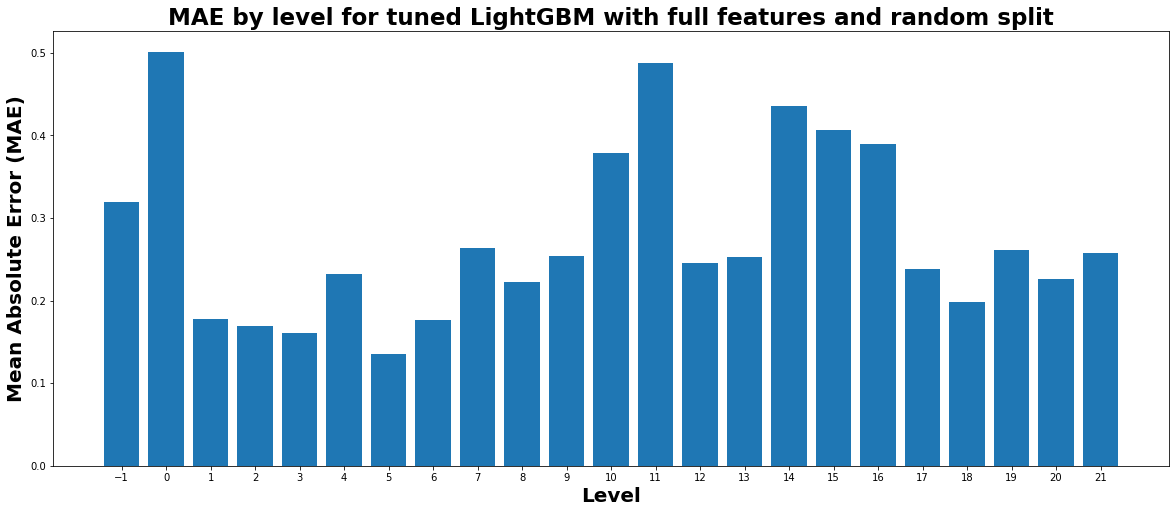

In [42]:
plot_mae_by_level(
    y_test_random_split,
    y_pred_test,
    title="MAE by level for tuned LightGBM with full features and random split",
)

In [43]:
predict = lgb_tuned.predict(X_test)
evaluate_round_predictions([0.5, 0.33, 0.45], y_test, predict)

Default:
RMSE: 0.18

Round type: 0.5
RMSE: 0.20

Round type: 0.33
RMSE: 0.22

Round type: 0.45
RMSE: 0.20



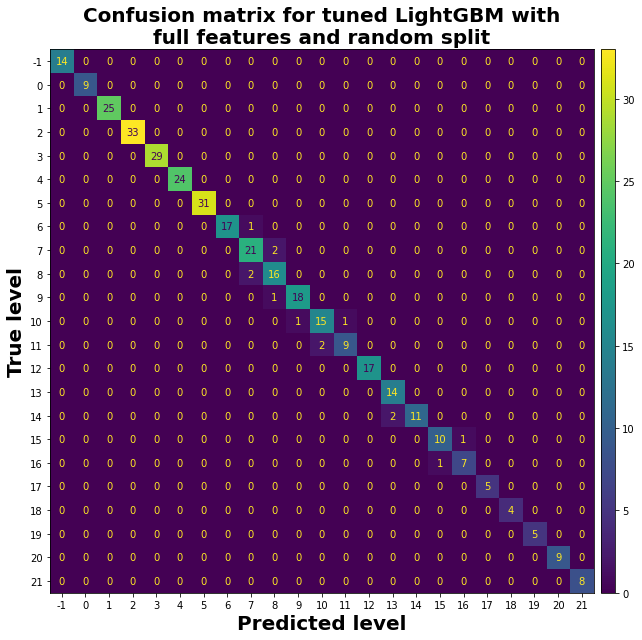

In [44]:
plot_confusion_matrix(
    predict,
    y_test,
    title="Confusion matrix for tuned LightGBM with\nfull features and random split",
)

## Summary

In [45]:
results

,Split type,Tuning type,Set of features,RMSE,MAE
0,chronological,default,full,0.965662,0.463517
1,chronological,Optuna,full,0.678976,0.389351
2,random,default,full,0.371349,0.246737
3,random,Optuna,full,0.312773,0.219705


In [46]:
from training.results import plot_summary

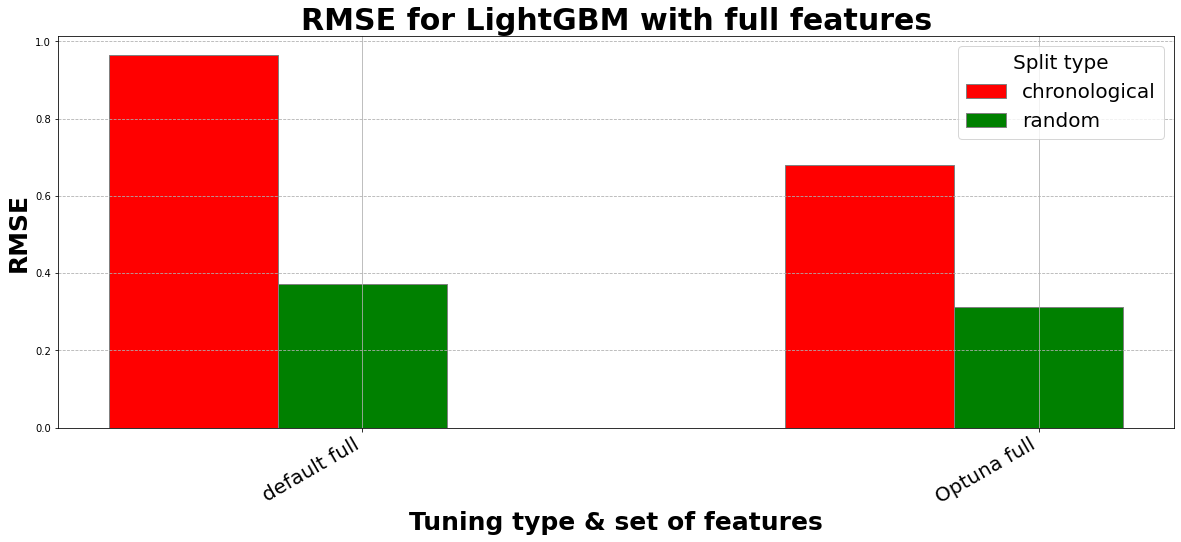

In [47]:
plot_summary(results, "RMSE", title="RMSE for LightGBM with full features")

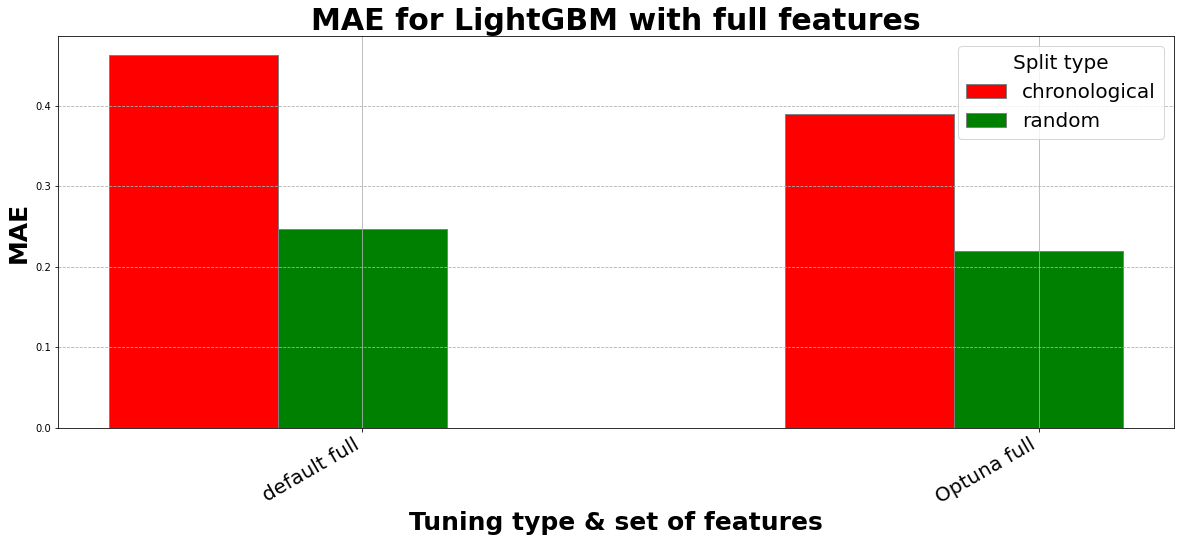

In [48]:
plot_summary(results, "MAE", title="MAE for LightGBM with full features")

In [49]:
results.to_csv("./lightgbm_full_results.csv")